In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# use paper style
style = "/home/gleung/scripts/styles/bee-paperlight.mplstyle"
# style = '/home/gleung/scripts/styles/bee-presentationtransparent.mplstyle'
plt.style.use(style)

# palettable default colors
from palettable.cartocolors.qualitative import Prism_8

prism = Prism_8.mpl_colors
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
orange = prism[6]
yellow = prism[5]
gray = "#303039"
bg = "white"
lcol = "black"

from palettable.cmocean.sequential import Ice_20

cloud = mcolors.ListedColormap(Ice_20.mpl_colors[4:])
cloud.set_bad(Ice_20.mpl_colors[4])
cloud.set_under(Ice_20.mpl_colors[4])

# set default font
font_dir = ["/home/gleung/scripts/futura"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams["font.family"] = "Futura"

import re

In [4]:
import os
import pandas as pd
import numpy as np
import xarray as xr

In [5]:
def read_mac_output(path):
    coords = []
    datas = []
    names = []

    with open(path) as file:
        file = file.readlines()

        breaks = []

        for i, f in enumerate(file):
            if "var" in f:
                breaks.append((i, f.strip().strip("var ")))
            elif "zsn" in f:
                zs = np.array(file[i + 1].split(", "), dtype="float")
            elif "xsn" in f:
                xs = np.array(file[i + 1].split(", "), dtype="float")
        for i in range(len(breaks)):
            name = breaks[i][1].strip("var")

            start = breaks[i][0] + 1
            if i < len(breaks) - 1:
                stop = breaks[i + 1][0]
            else:
                stop = len(file)

            data = file[start:stop]
            data = np.array([d.strip().split(",") for d in data], dtype="float")

            datas.append(data)
            names.append(name)

    ds = xr.Dataset(
        data_vars={names[i]: (["z", "x"], datas[i]) for i in range(len(names))},
        coords={"x": xs, "z": zs},
    )

    return ds

# Task 2

In [8]:
def plot_var(
    ax, dataPath, var, label, t, time, levels=11, cmap=None, norm=None
):
    path = f"{dataPath}/hw4_output_timestep_{t}.txt"
    ds = read_mac_output(path)

    c = ax.contourf(
        ds.x / 1000,
        ds.z / 1000,
        ds[var],
        extend="both",
        levels=levels,
        norm=norm,
        cmap=cmap,
    )

    plt.colorbar(c, ax=ax, label=label)

    ax.set_ylabel("Altitude (km)")
    ax.set_xlabel("Horizontal Distance (km)")

    ax.axvline(0)
    ax.axvline(32.4)
    ax.axvline(16.2, ls="--")
    ax.axhline(0)
    ax.axhline(16)

    ax.set_title(f"t={time} s")

    return ax

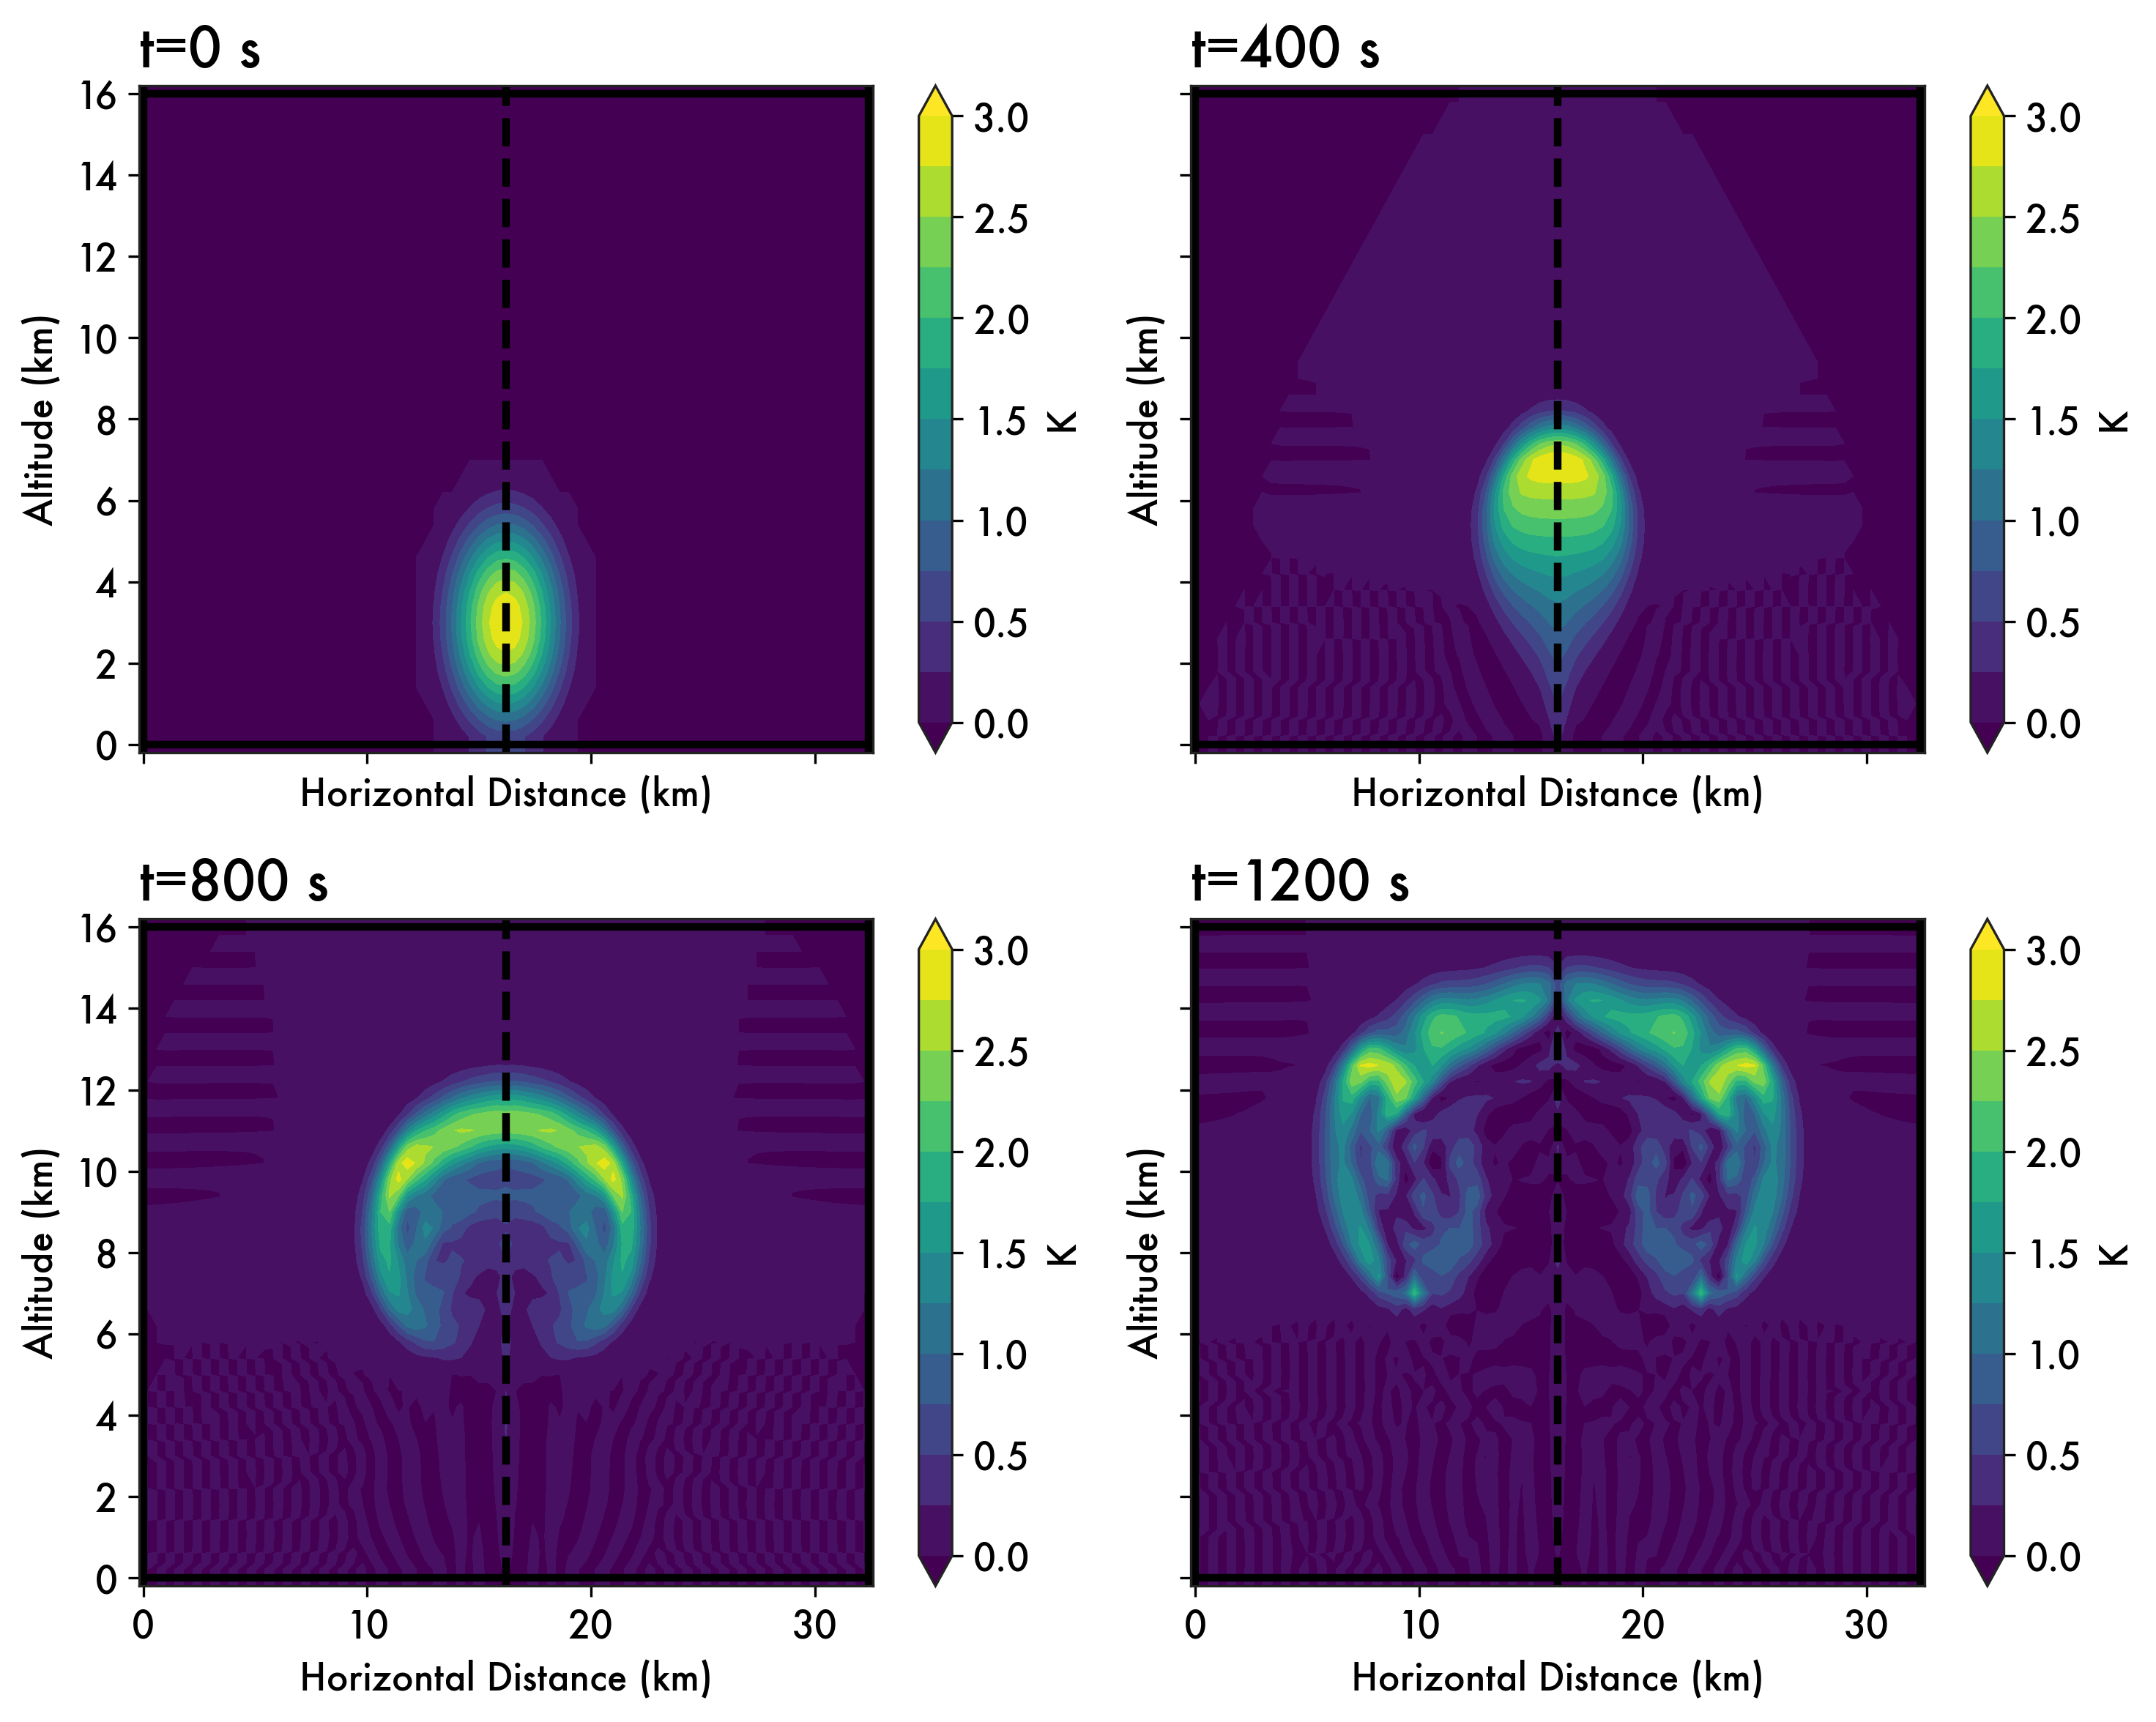

In [9]:
dataPath = "d400/"
times = [0, 200, 400, 600]
var = "THP_pres"
label = "K"
cmap = None
norm = None
levels = np.arange(0, 3.25, 0.25)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 8))
axes = axes.flatten()

for ax, time in zip(axes, times):
    ax = plot_var(ax, dataPath, var, label, time, time * 2, levels)

plt.show()
plt.close("all")

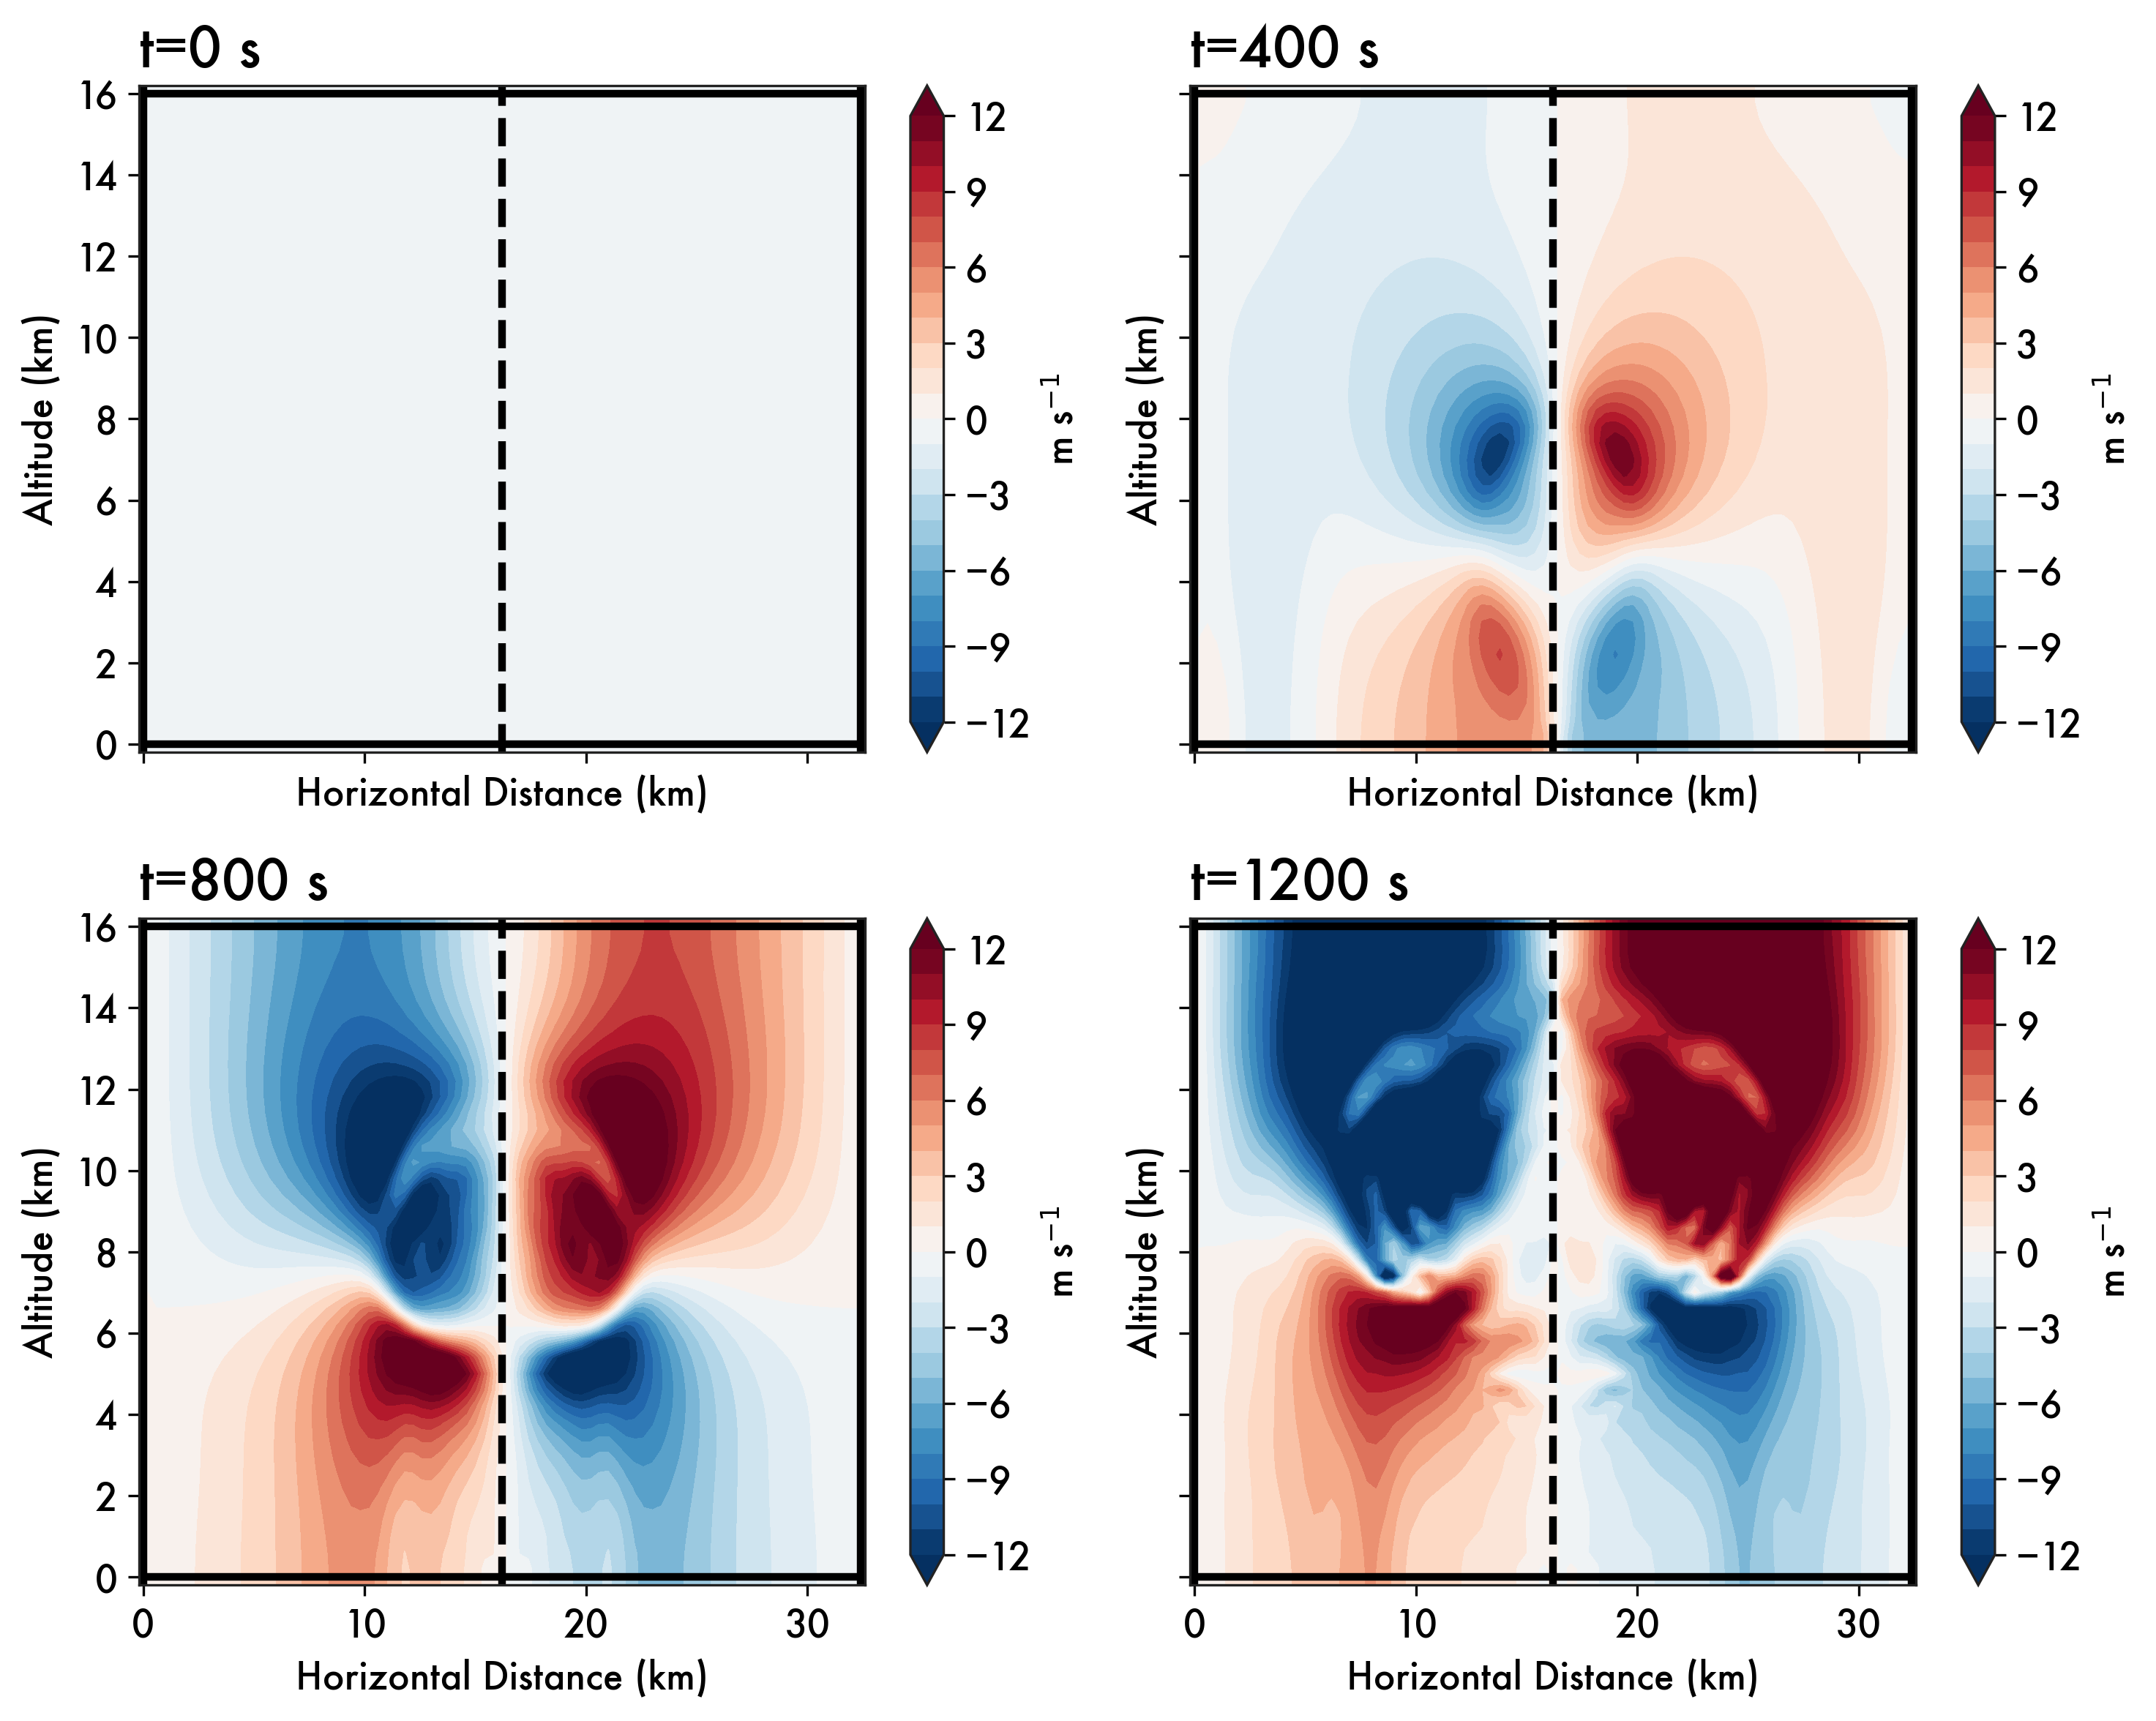

In [10]:
dataPath = "d400/"
var = "UP_pres"
label = "m s$^{-1}$"
cmap = "RdBu_r"
norm = mcolors.TwoSlopeNorm(vcenter=0)
levels = np.arange(-12, 13, 1)
times = [0, 200, 400, 600]

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 8))
axes = axes.flatten()

for ax, time in zip(axes, times):
    ax = plot_var(ax, dataPath, var, label, time, time * 2, levels, cmap, norm)

plt.show()
plt.close("all")

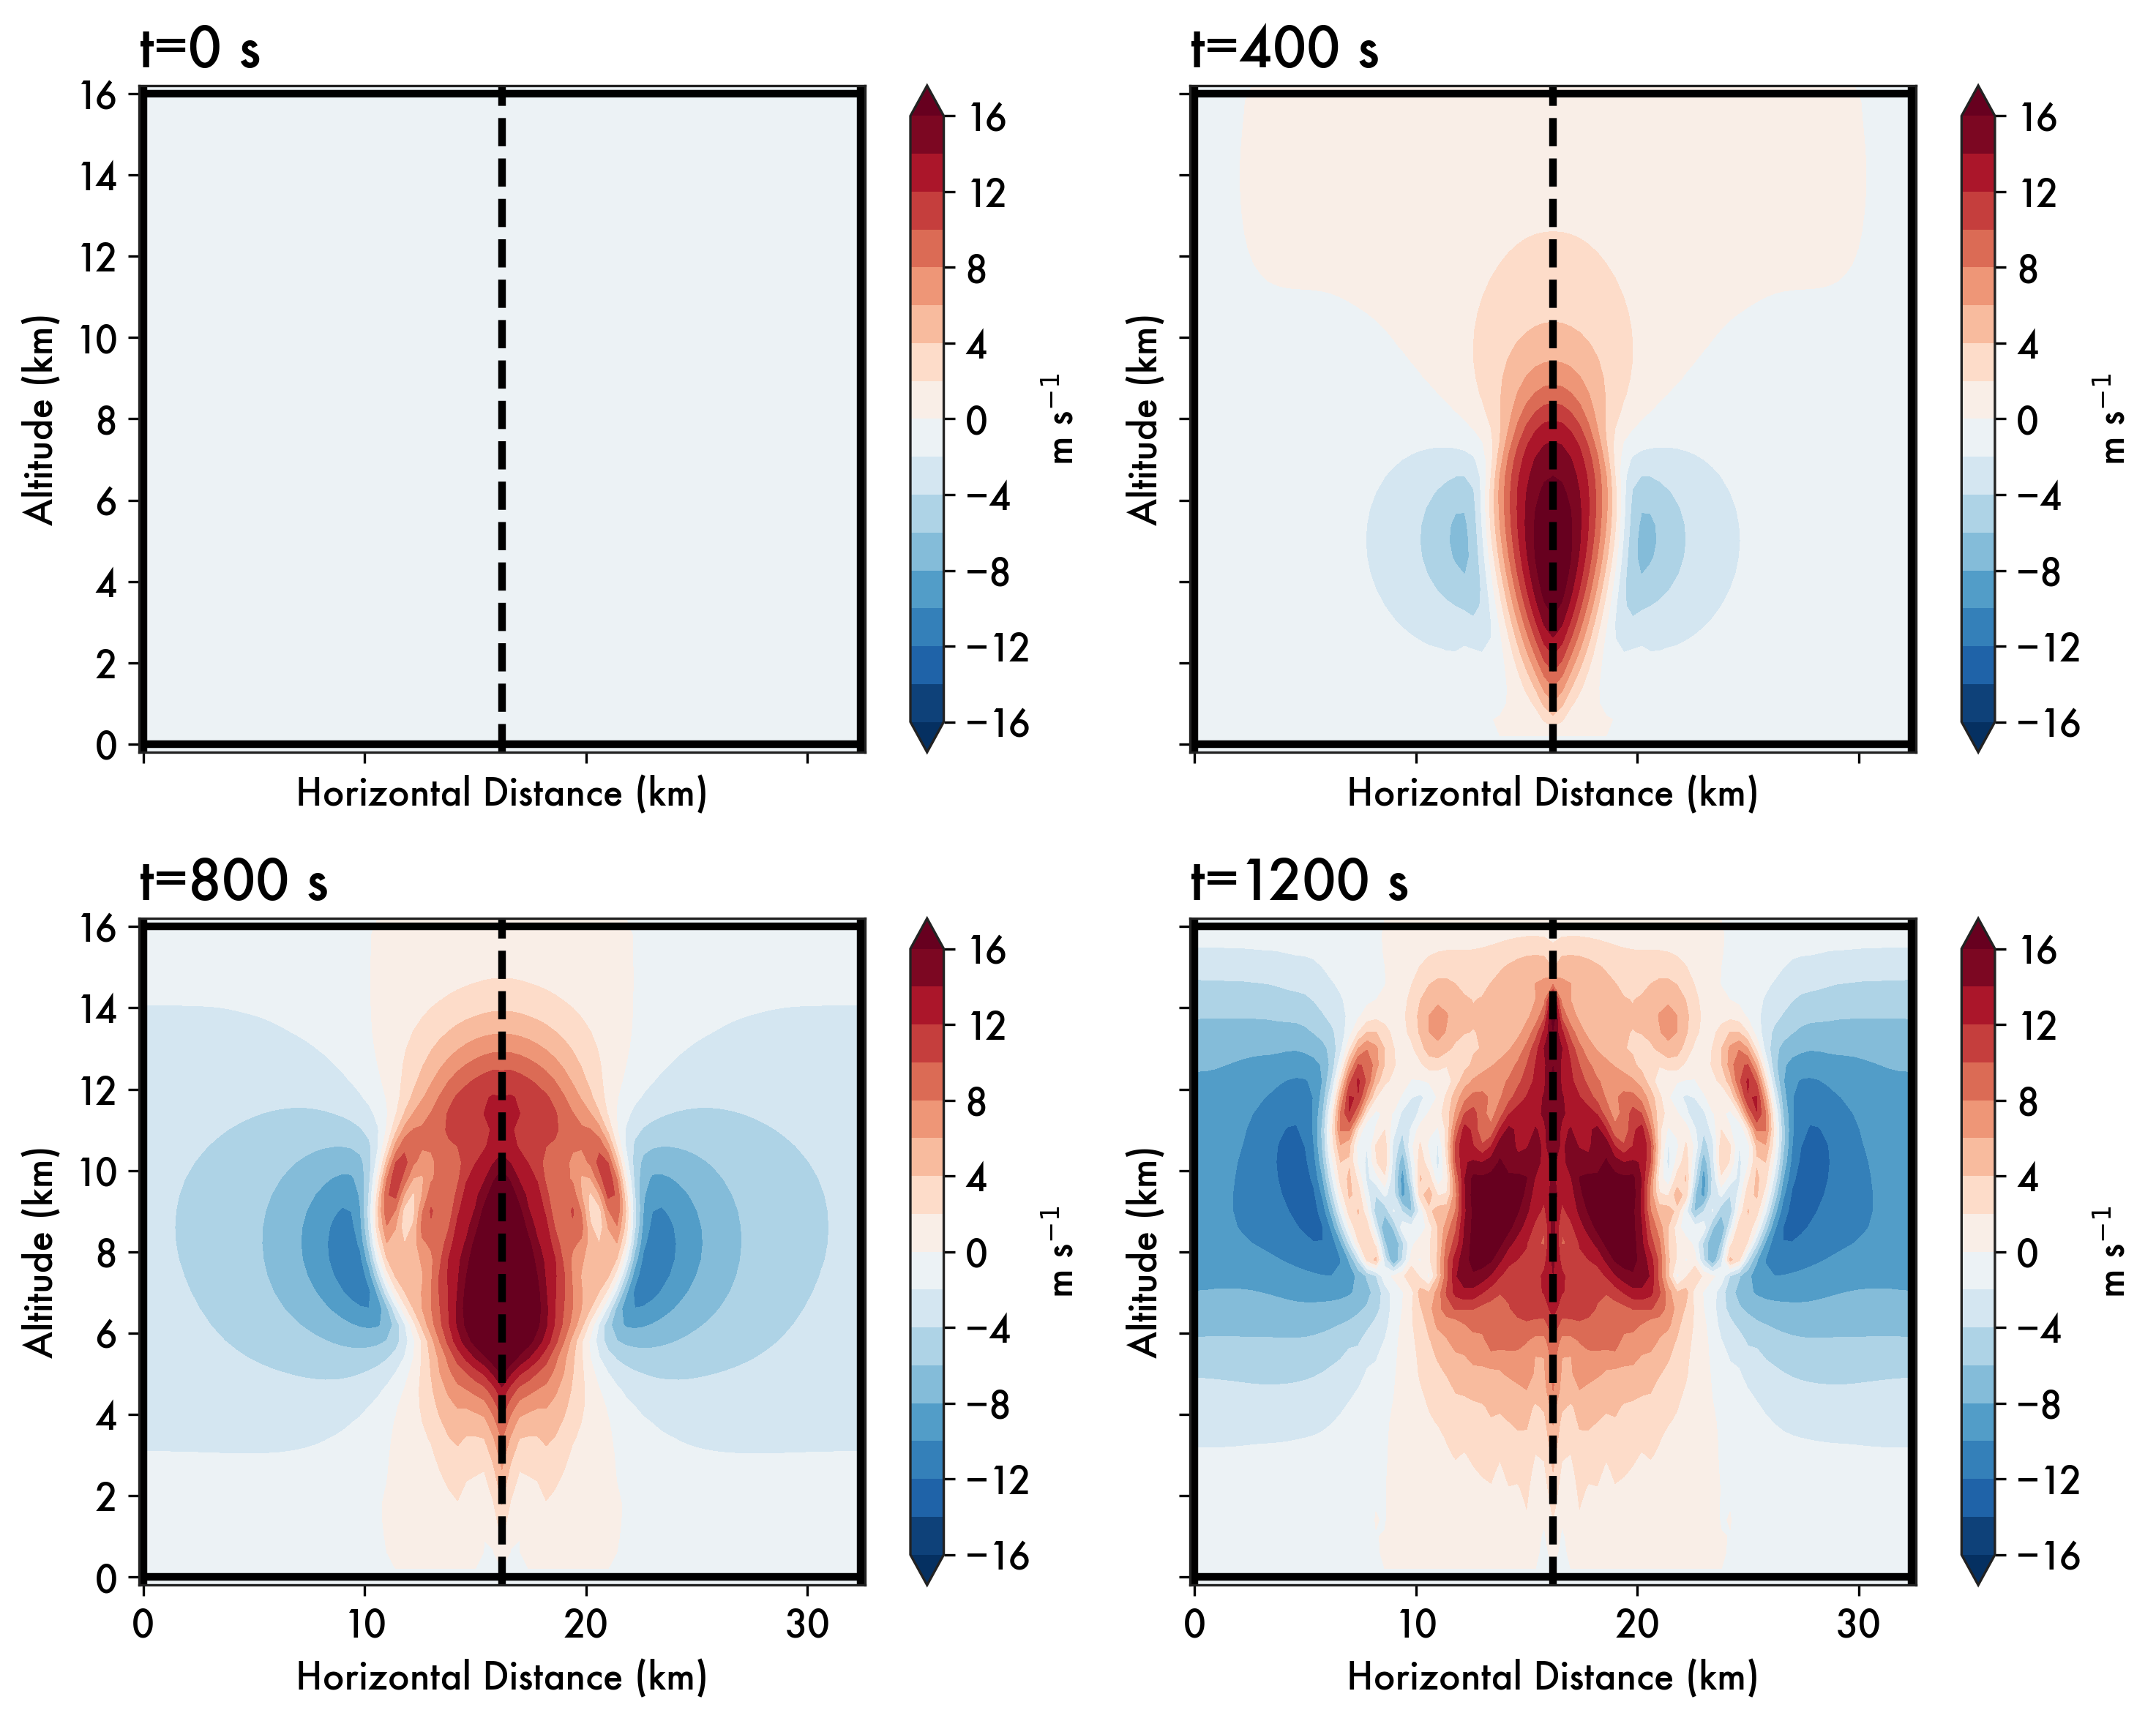

In [11]:
dataPath = "d400/"
var = "WP_pres"
label = "m s$^{-1}$"
cmap = "RdBu_r"
norm = mcolors.TwoSlopeNorm(vcenter=0)
levels = np.arange(-16, 18, 2)
times = [0, 200, 400, 600]

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 8))
axes = axes.flatten()

for ax, time in zip(axes, times):
    ax = plot_var(ax, dataPath, var, label, time, time * 2, levels, cmap, norm)

plt.show()
plt.close("all")

# Task 3

## Test Grid Spacing

d200/ 2.486422
d400/ 2.847857
d800/ 2.778658


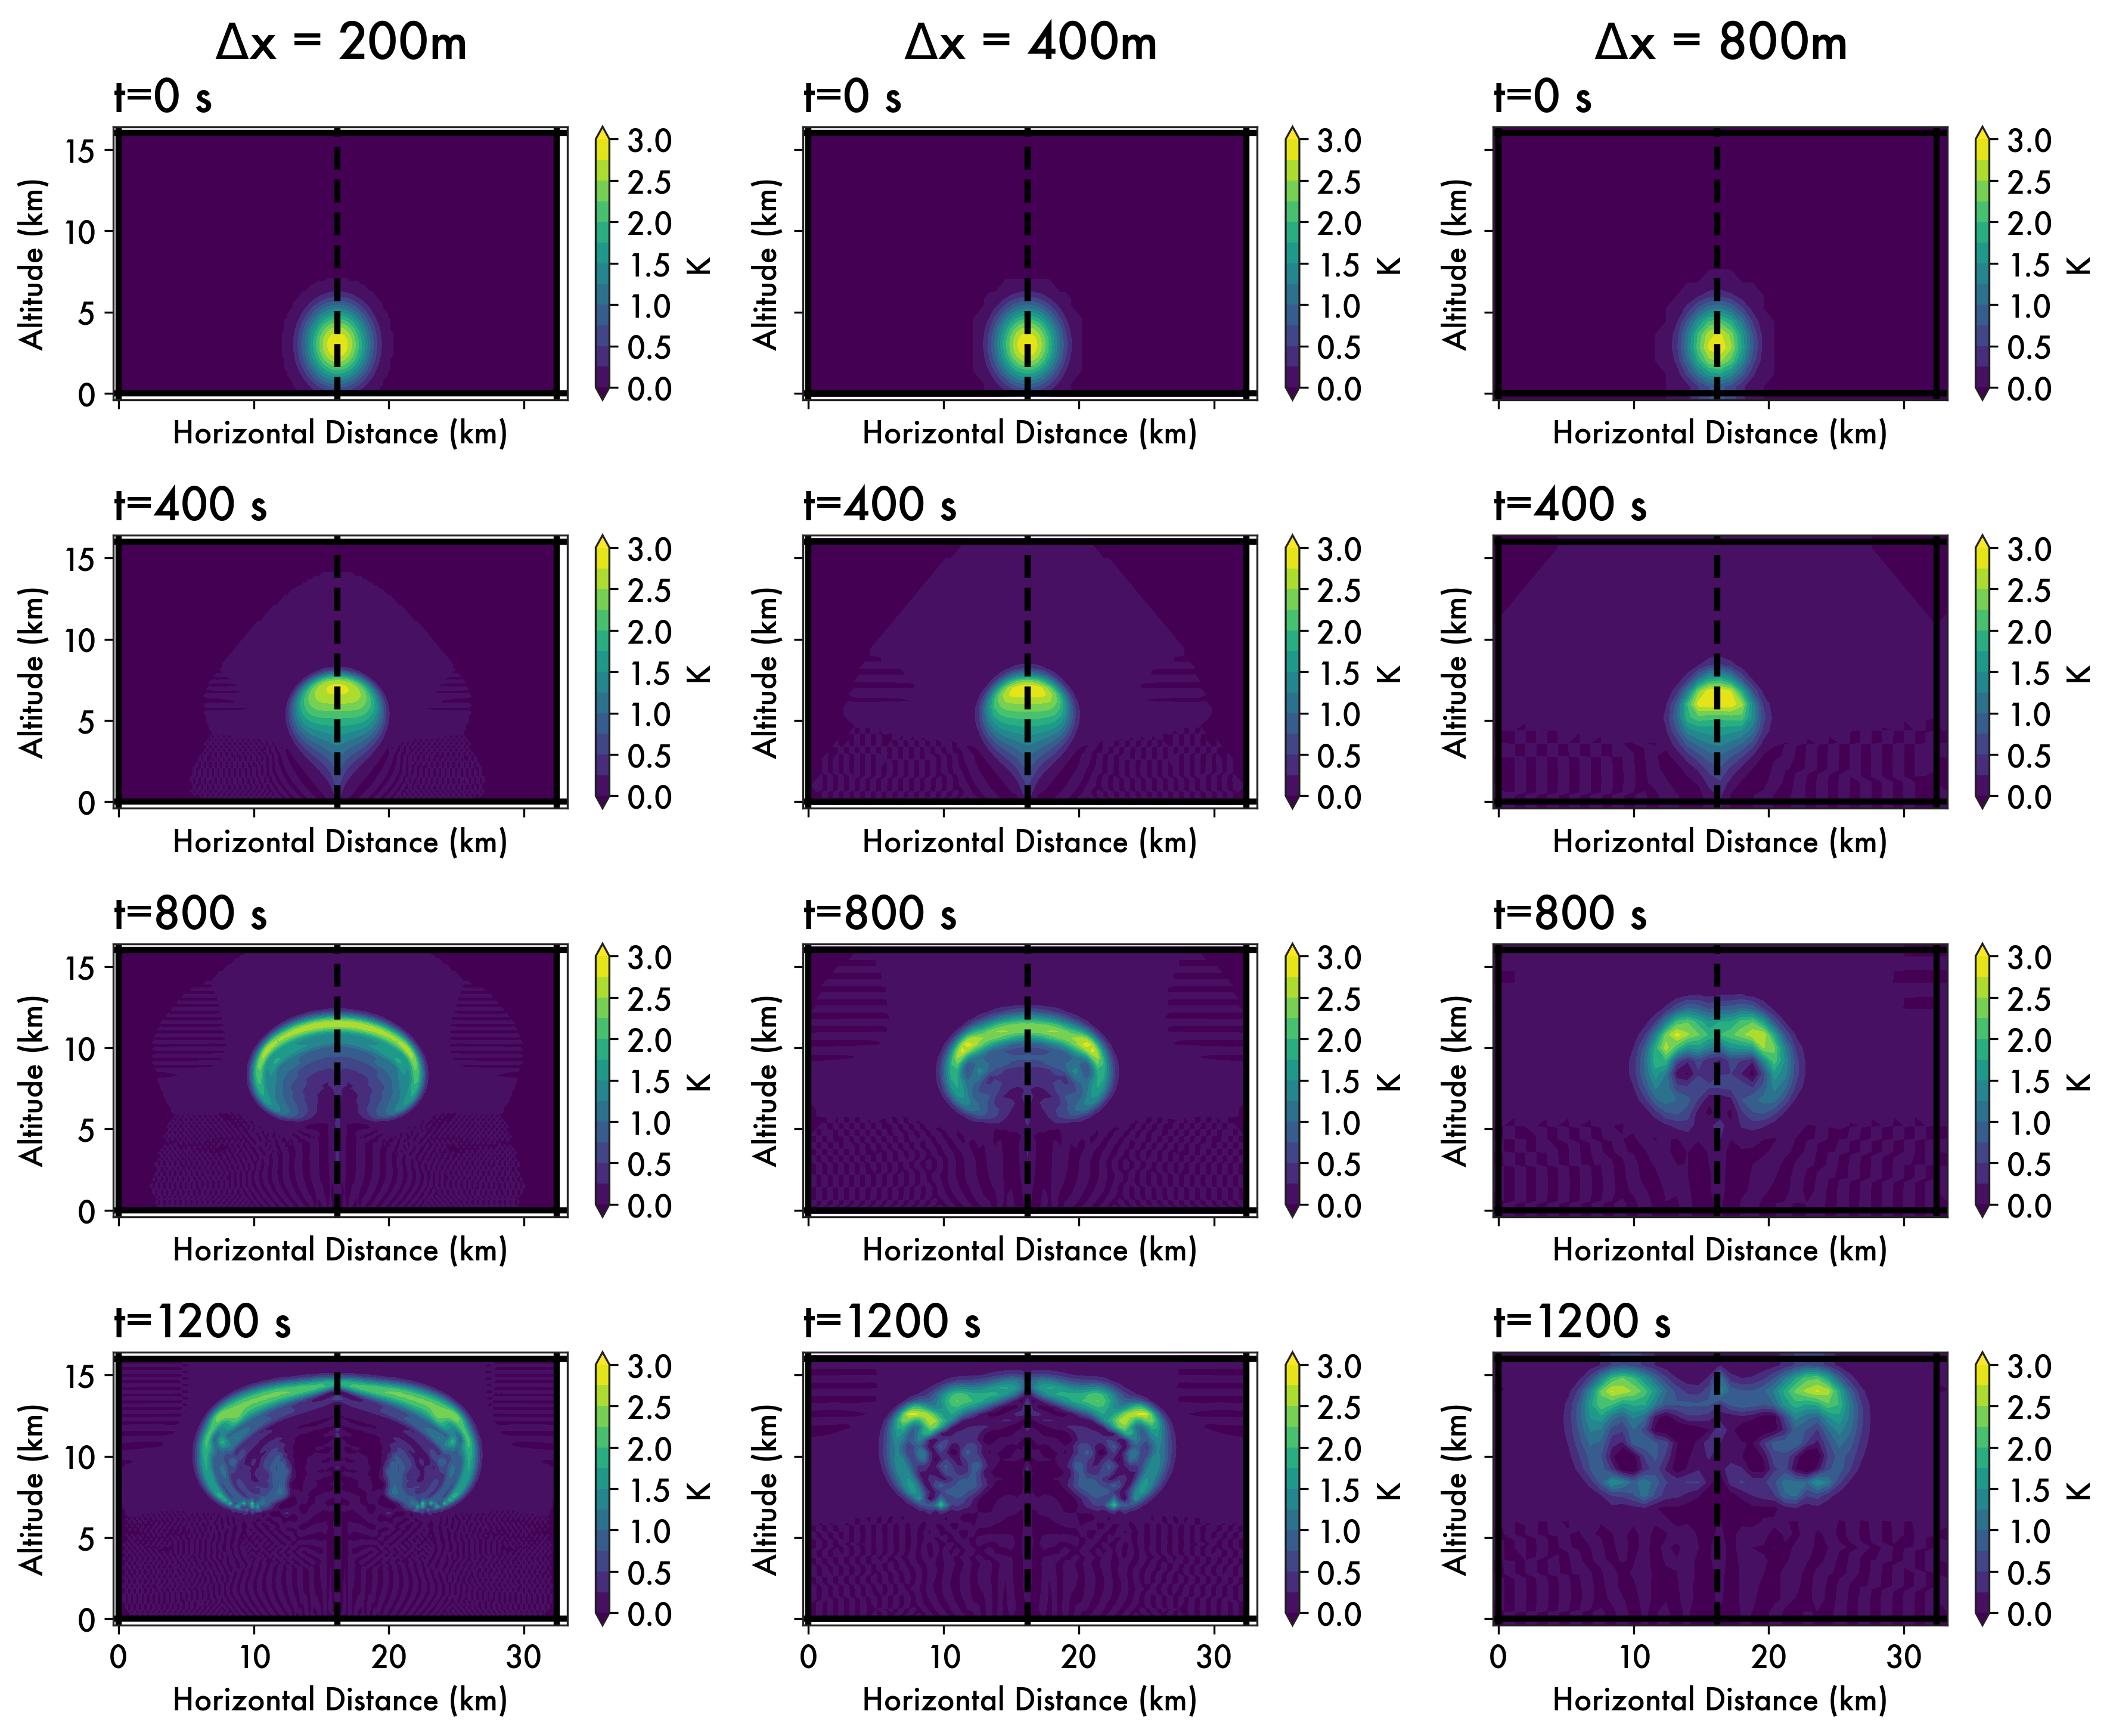

In [12]:
var = "THP_pres"
label = "K"
cmap = None
norm = None
levels = np.arange(0, 3.25, 0.25)

fig, axess = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12, 10))

for axes, time in zip(axess, [0, 200, 400, 600]):
    for ax, path in zip(axes, ["d200/", "d400/", "d800/"]):
        if path == "d200/":
            t = time * 2
        else:
            t = time

        ax = plot_var(ax, path, var, label, t, time * 2, levels, cmap, norm)

        if time == 600:
            ds = read_mac_output(f"{path}hw4_output_timestep_{t}.txt")
            print(path, ds[var].max().values)


for ax, lab in zip(axess[0], [200, 400, 800]):
    ax.text(
        0.5,
        1.3,
        f"$\Delta$x = {lab}m",
        transform=ax.transAxes,
        va="center",
        ha="center",
        fontsize=20,
    )

plt.show()
plt.close("all")

d200/ 23.89539
d400/ 24.3562
d800/ 30.34917


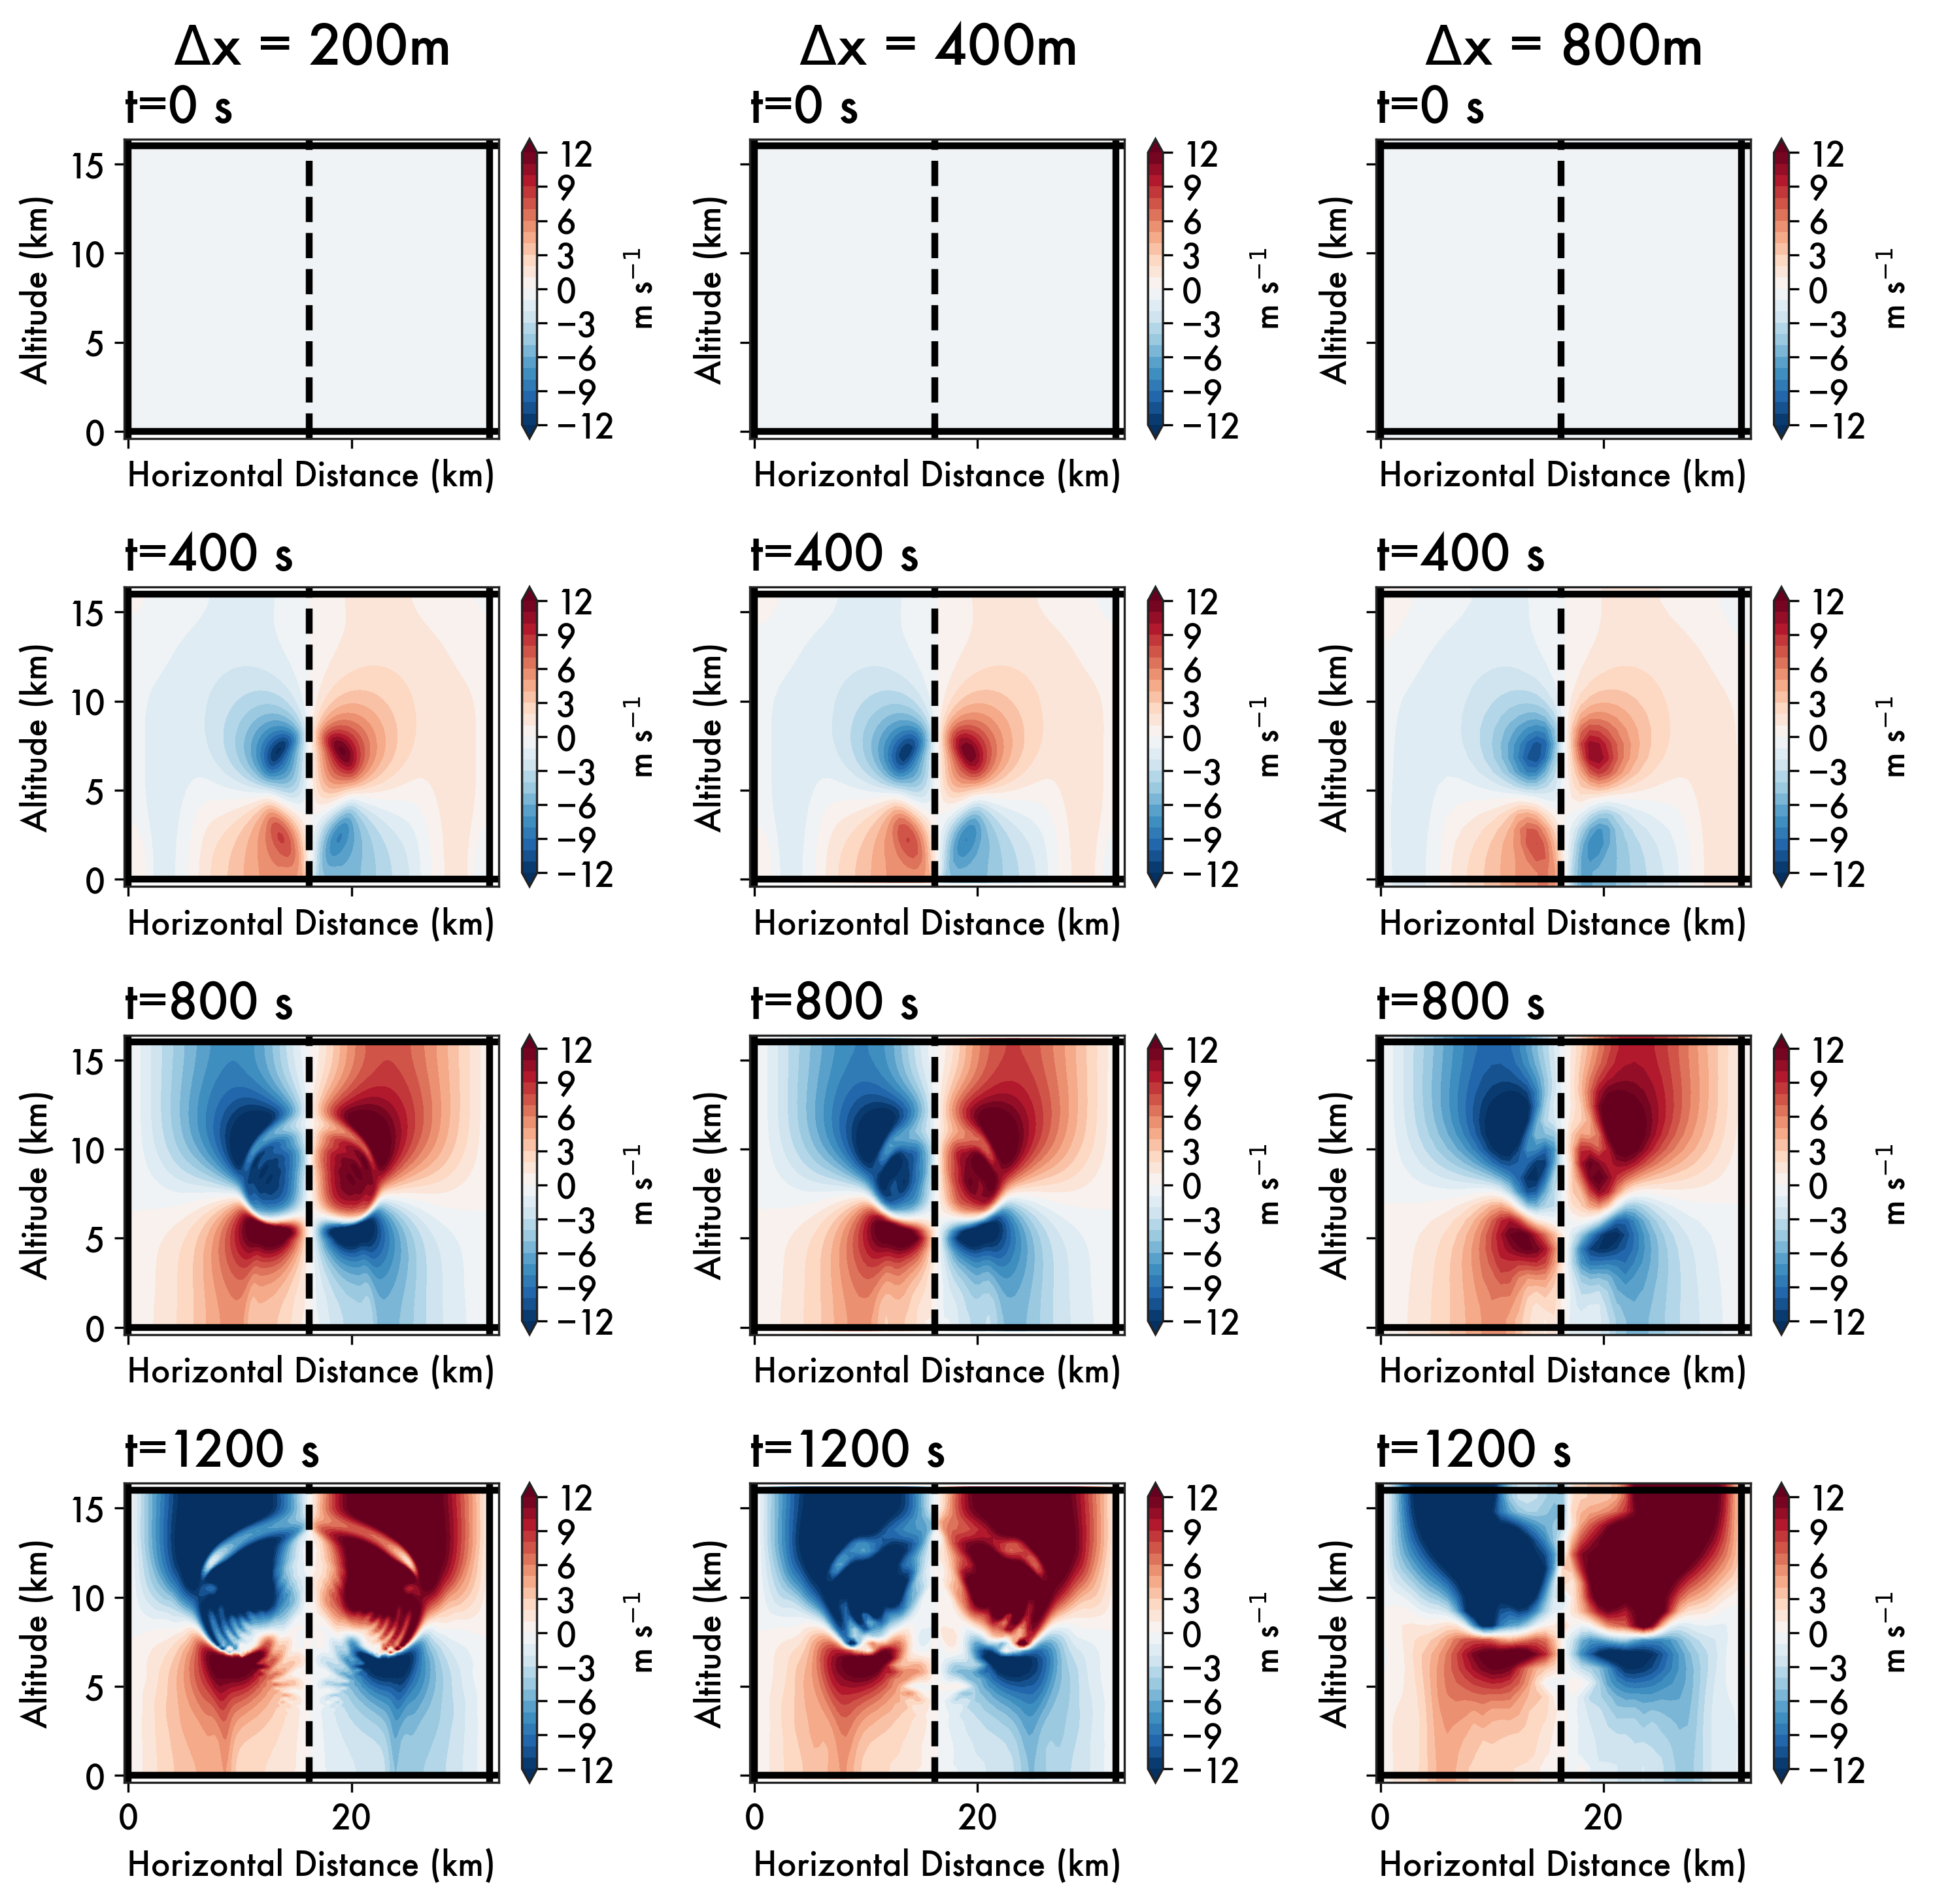

In [13]:
var = "UP_pres"
label = "m s$^{-1}$"
cmap = "RdBu_r"
norm = mcolors.TwoSlopeNorm(vcenter=0)
levels = np.arange(-12, 13, 1)
times = [0, 200, 400, 600]

fig, axess = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(10, 10))

for axes, time in zip(axess, [0, 200, 400, 600]):
    for ax, path in zip(axes, ["d200/", "d400/", "d800/"]):
        if path == "d200/":
            t = time * 2
        else:
            t = time

        ax = plot_var(ax, path, var, label, t, time * 2, levels, cmap, norm)

        if time == 600:
            ds = read_mac_output(f"{path}hw4_output_timestep_{t}.txt")
            print(path, ds[var].max().values)


for ax, lab in zip(axess[0], [200, 400, 800]):
    ax.text(
        0.5,
        1.3,
        f"$\Delta$x = {lab}m",
        transform=ax.transAxes,
        va="center",
        ha="center",
        fontsize=20,
    )

plt.show()
plt.close("all")

d200/ 20.13982
d400/ 19.08527
d800/ 22.11786


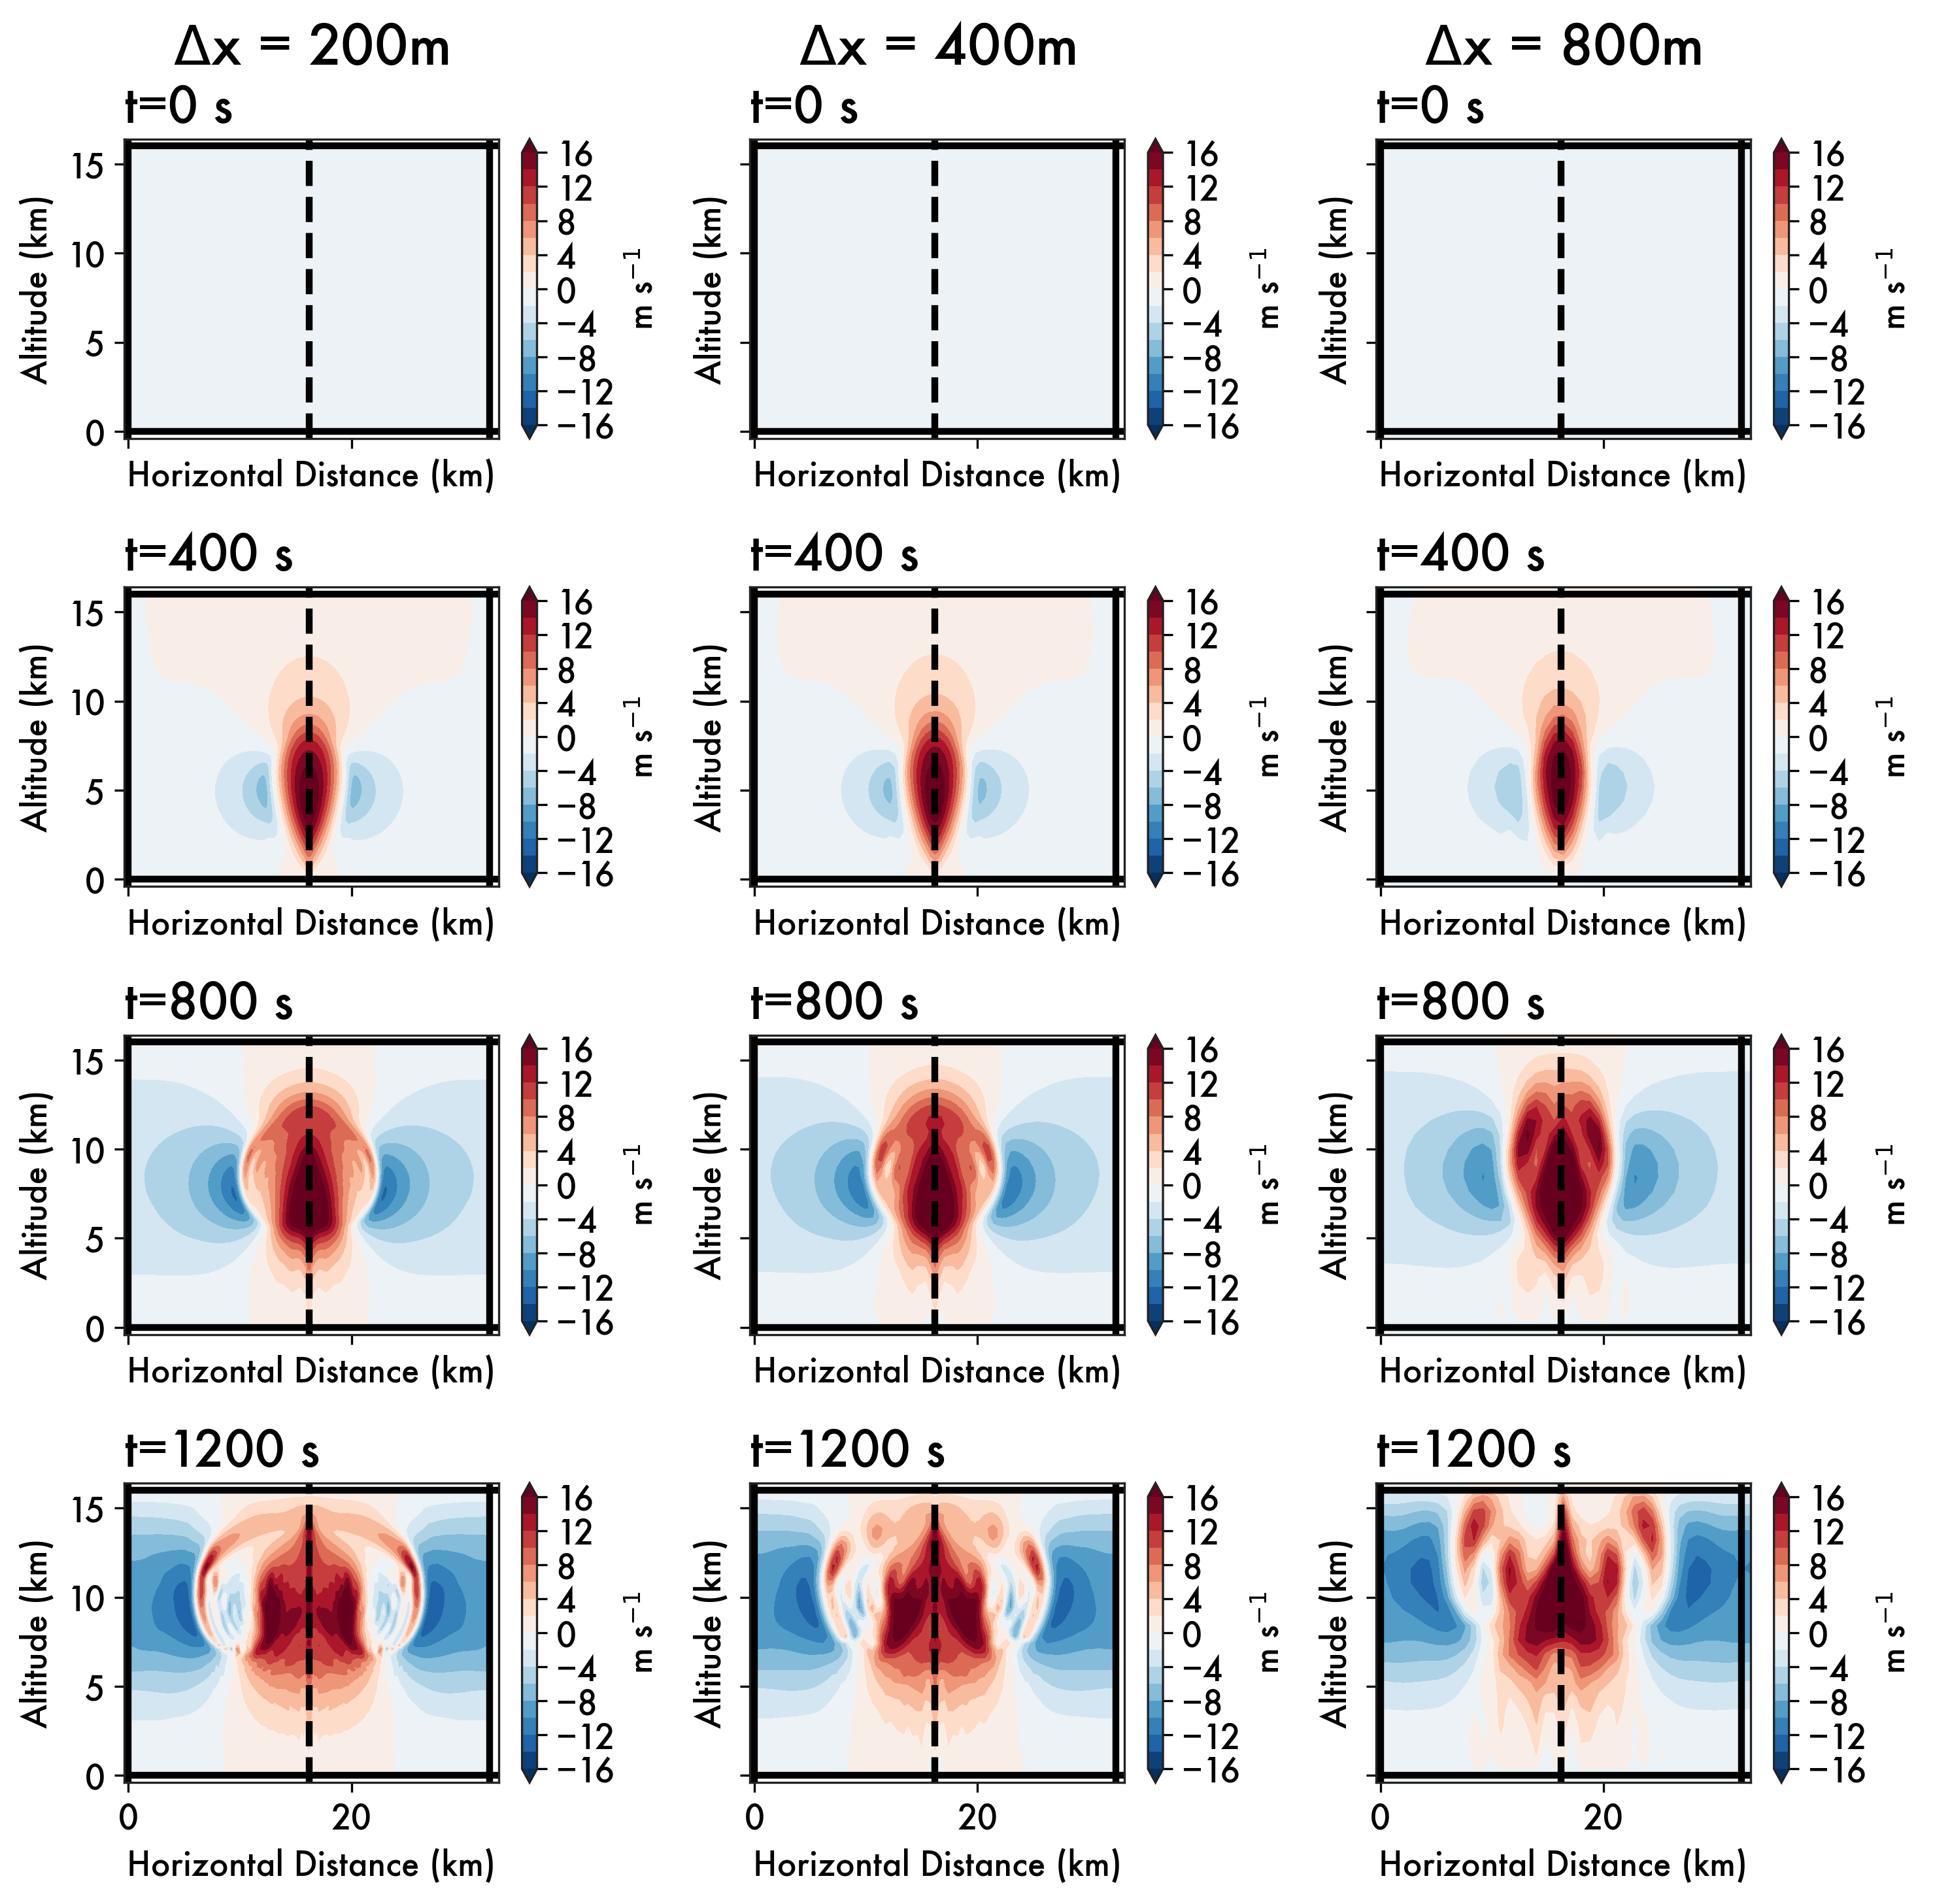

In [14]:
var = "WP_pres"
label = "m s$^{-1}$"
cmap = "RdBu_r"
norm = mcolors.TwoSlopeNorm(vcenter=0)
levels = np.arange(-16, 18, 2)

fig, axess = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(10, 10))

for axes, time in zip(axess, [0, 200, 400, 600]):
    for ax, path in zip(axes, ["d200/", "d400/", "d800/"]):
        if path == "d200/":
            t = time * 2
        else:
            t = time

        ax = plot_var(ax, path, var, label, t, 2 * time, levels, cmap, norm)

        if time == 600:
            ds = read_mac_output(f"{path}hw4_output_timestep_{t}.txt")
            print(path, ds[var].max().values)

for ax, lab in zip(axess[0], [200, 400, 800]):
    ax.text(
        0.5,
        1.3,
        f"$\Delta$x = {lab}m",
        transform=ax.transAxes,
        va="center",
        ha="center",
        fontsize=20,
    )

plt.show()
plt.close("all")

## Test Speed of Sound

d400/ 2.847857
c100/ 3.589586
c300/ 3.762852


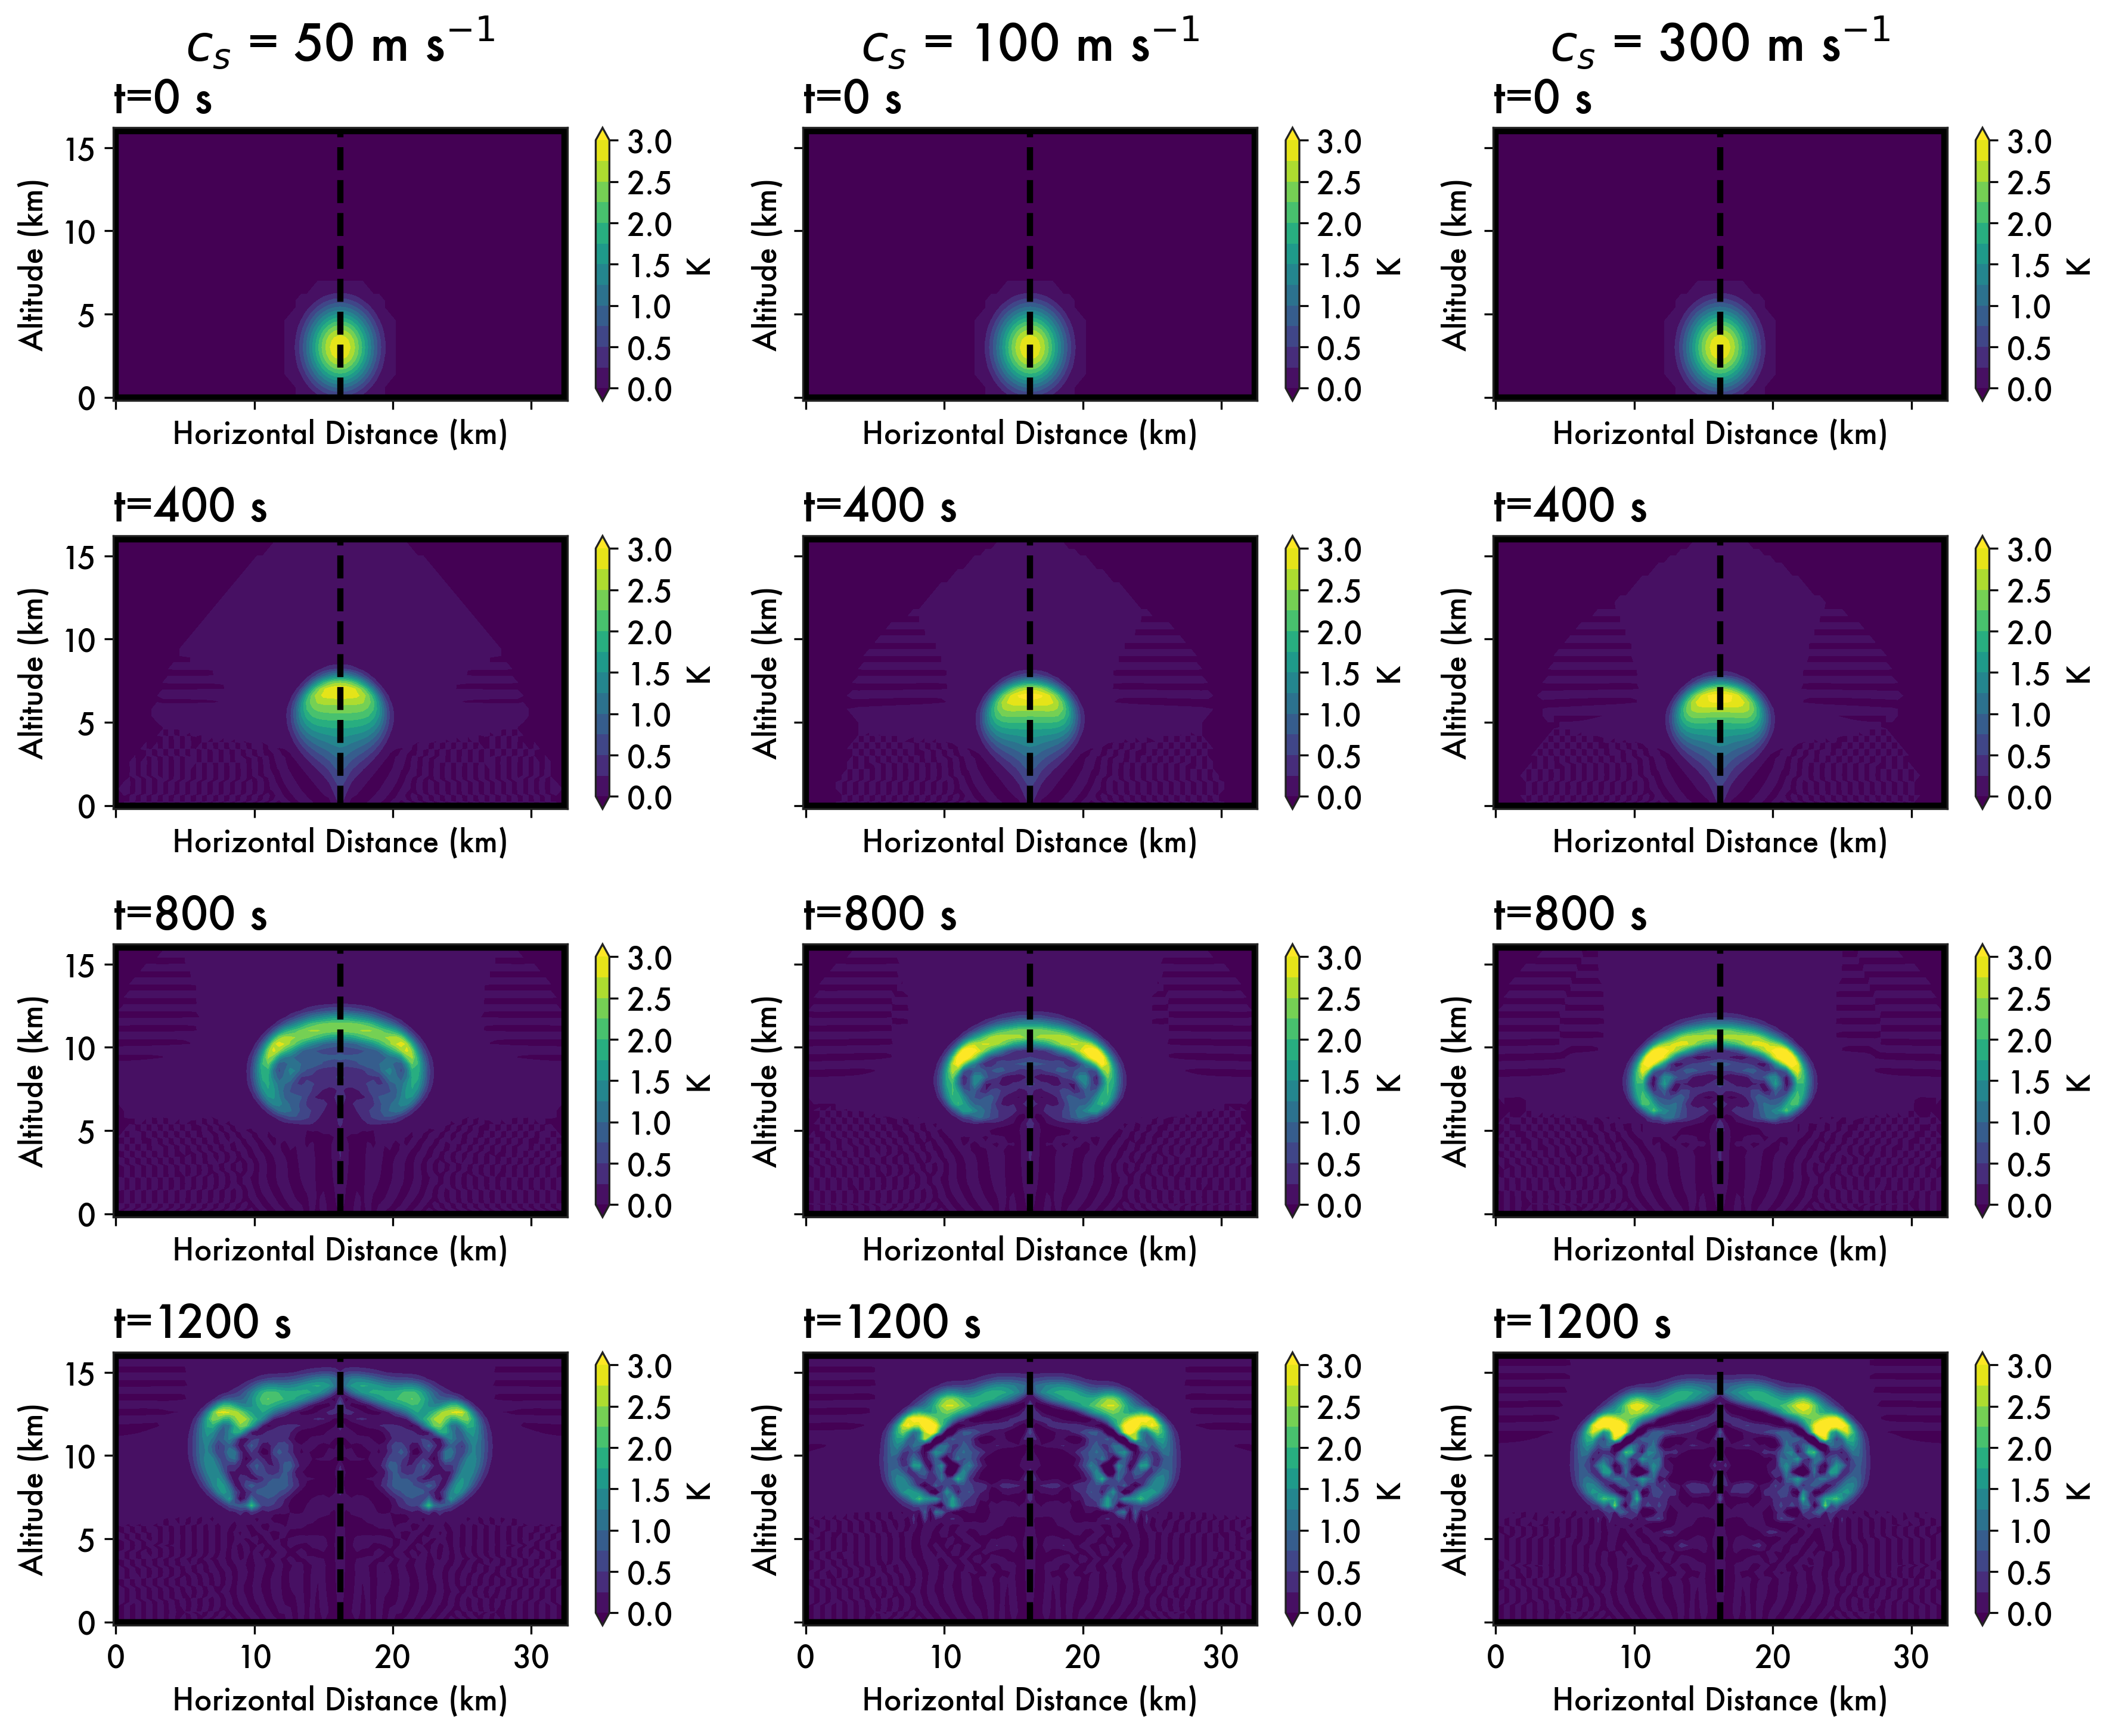

In [19]:
var = "THP_pres"
label = "K"
cmap = None
norm = None
levels = np.arange(0, 3.25, 0.25)

fig, axess = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12, 10))

for axes, time in zip(axess, [0, 200, 400, 600]):
    for ax, path in zip(axes, ["d400/", "c100/", "c300/"]):
        if path == "c100/":
            t = time * 2
        elif path == "c300/":
            t = time * 4
        else:
            t = time

        ax = plot_var(ax, path, var, label, t, 2 * time, levels, cmap, norm)

        if time == 600:
            ds = read_mac_output(f"{path}hw4_output_timestep_{t}.txt")
            print(path, ds[var].max().values)


for ax, lab in zip(axess[0], [50, 100, 300]):
    ax.text(
        0.5,
        1.3,
        f"$c_s$ = {lab} m s$^{{-1}}$",
        transform=ax.transAxes,
        va="center",
        ha="center",
        fontsize=20,
    )

plt.show()
plt.close("all")

d400/ 24.3562
c100/ 29.74147
c300/ 31.13869


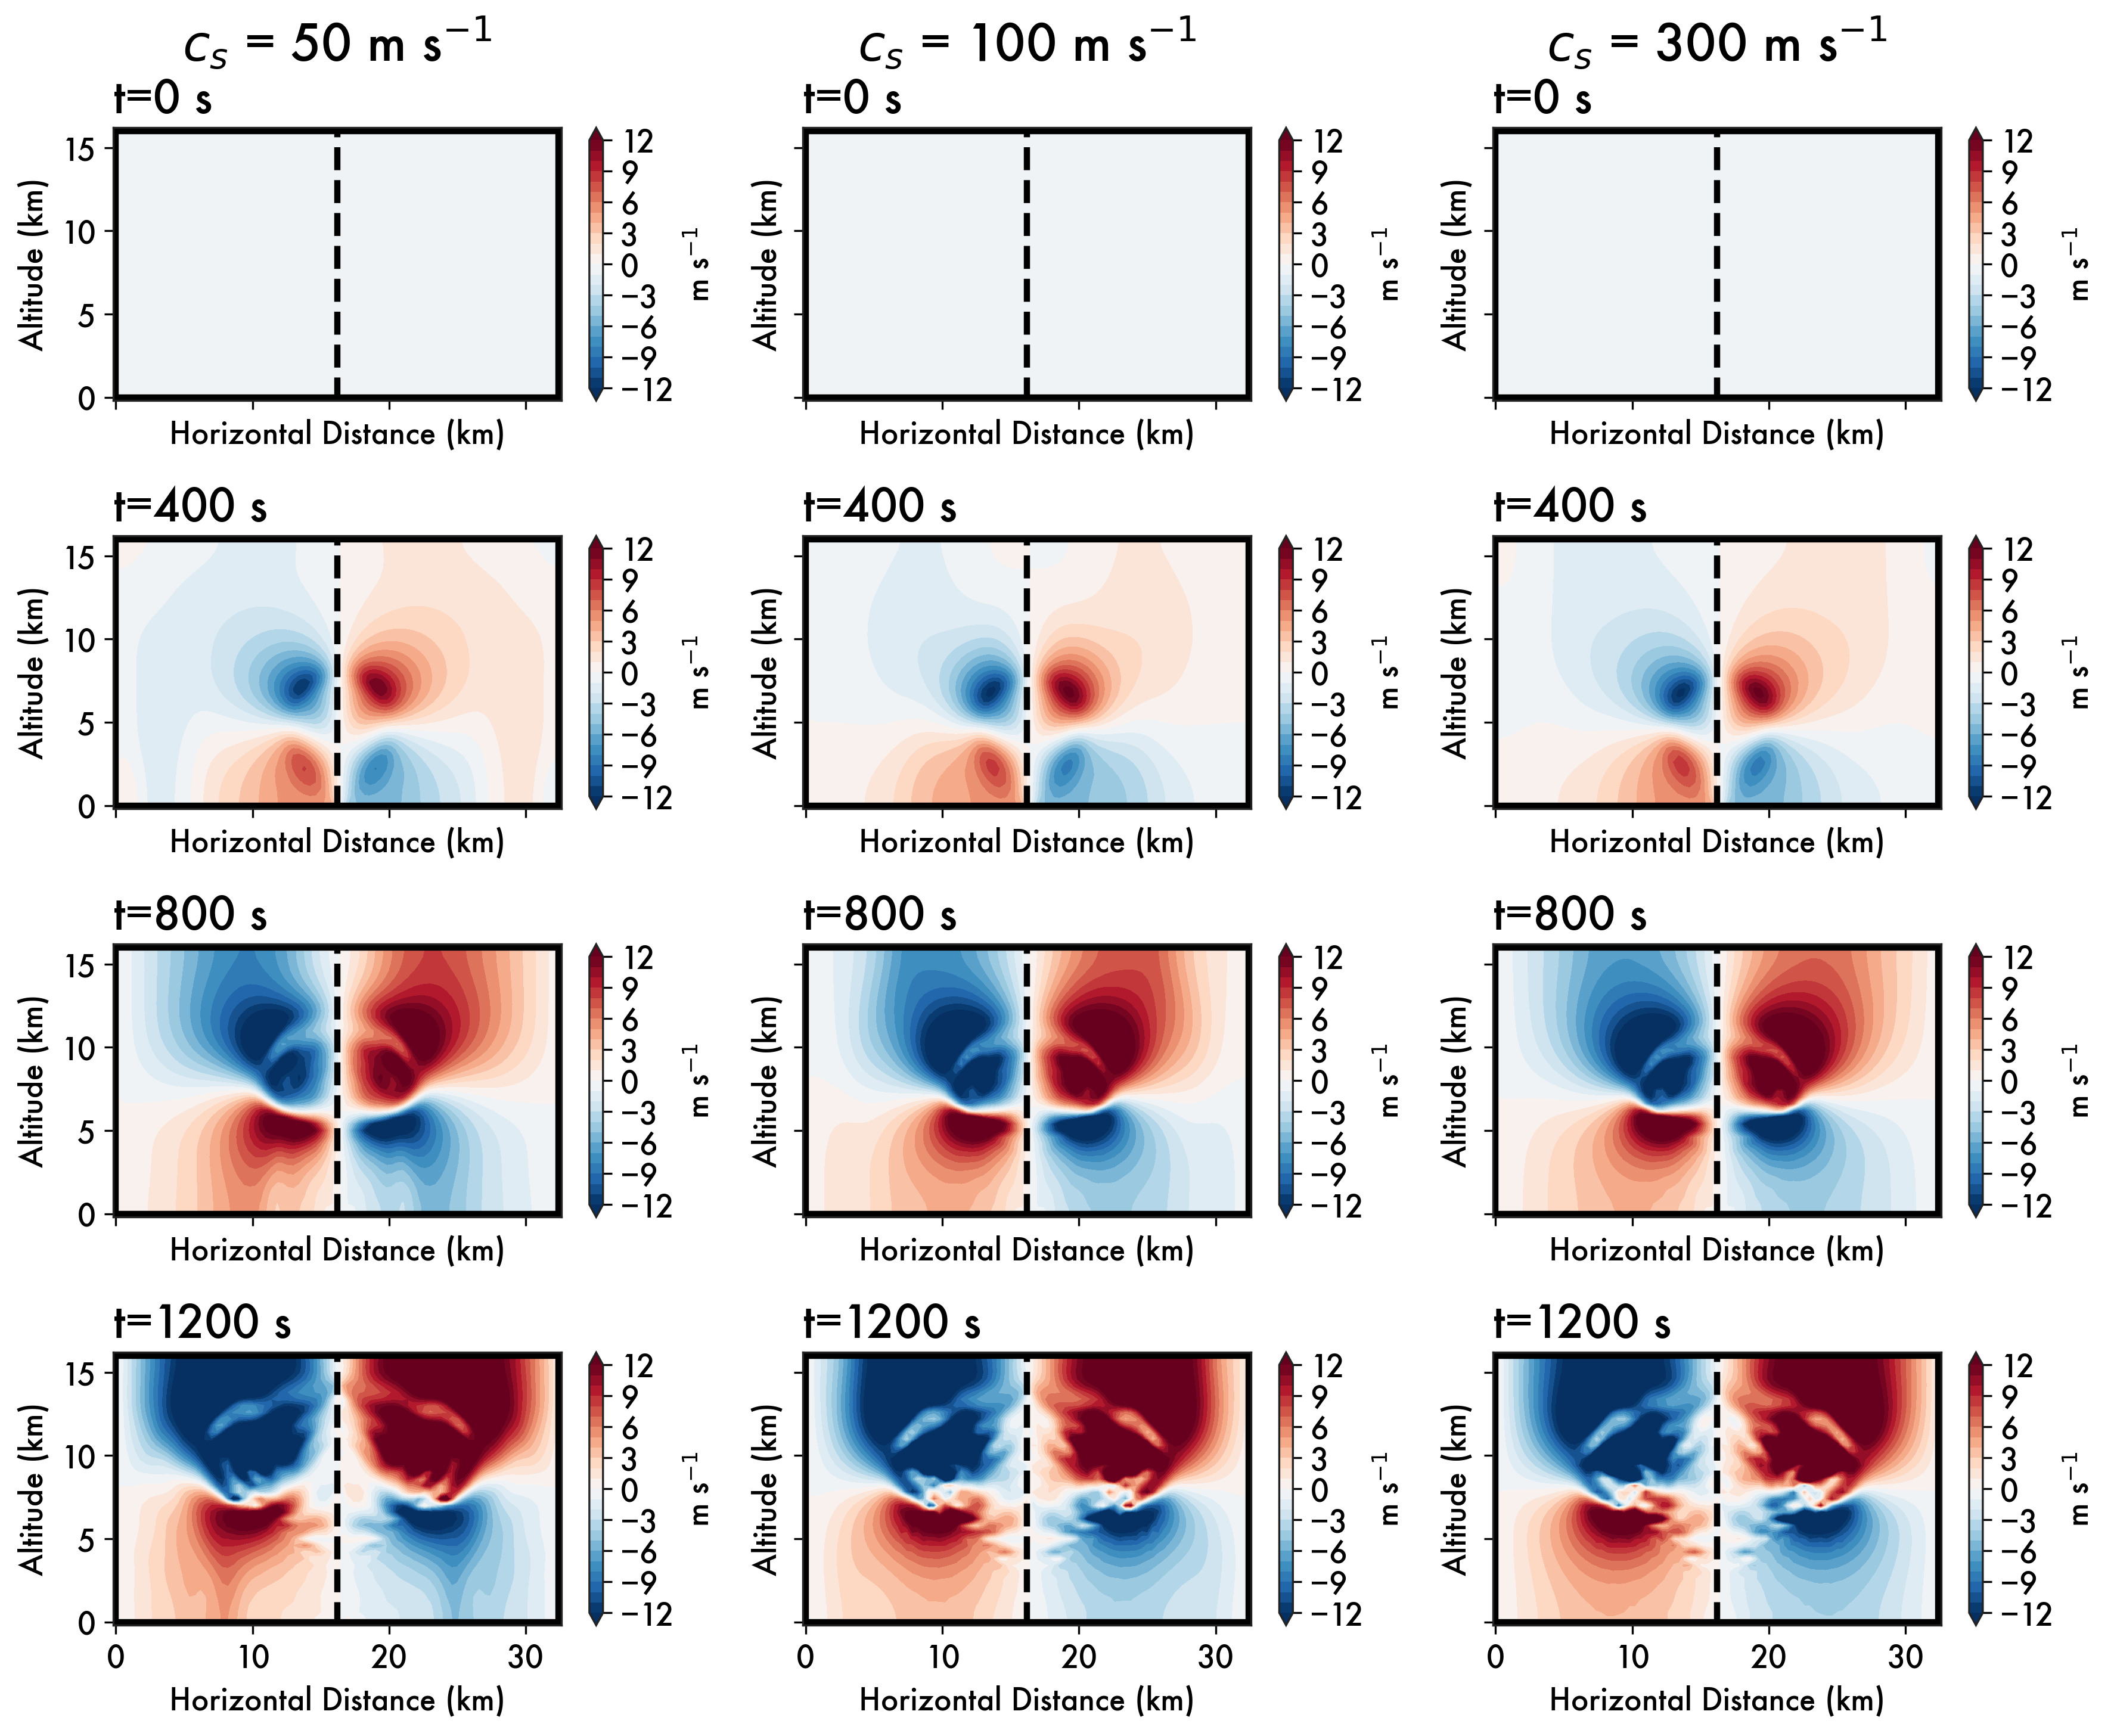

In [20]:
var = "UP_pres"
label = "m s$^{-1}$"
cmap = "RdBu_r"
norm = mcolors.TwoSlopeNorm(vcenter=0)
levels = np.arange(-12, 13, 1)
times = [0, 200, 400, 600]

fig, axess = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12, 10))

for axes, time in zip(axess, [0, 200, 400, 600]):
    for ax, path in zip(axes, ["d400/", "c100/", "c300/"]):
        if path == "c100/":
            t = time * 2
        elif path == "c300/":
            t = time * 4
        else:
            t = time

        ax = plot_var(ax, path, var, label, t, 2 * time, levels, cmap, norm)

        if time == 600:
            ds = read_mac_output(f"{path}hw4_output_timestep_{t}.txt")
            print(path, ds[var].max().values)


for ax, lab in zip(axess[0], [50, 100, 300]):
    ax.text(
        0.5,
        1.3,
        f"$c_s$ = {lab} m s$^{{-1}}$",
        transform=ax.transAxes,
        va="center",
        ha="center",
        fontsize=20,
    )

plt.show()
plt.close("all")

d400/ 19.08527
c100/ 19.55242
c300/ 21.41932


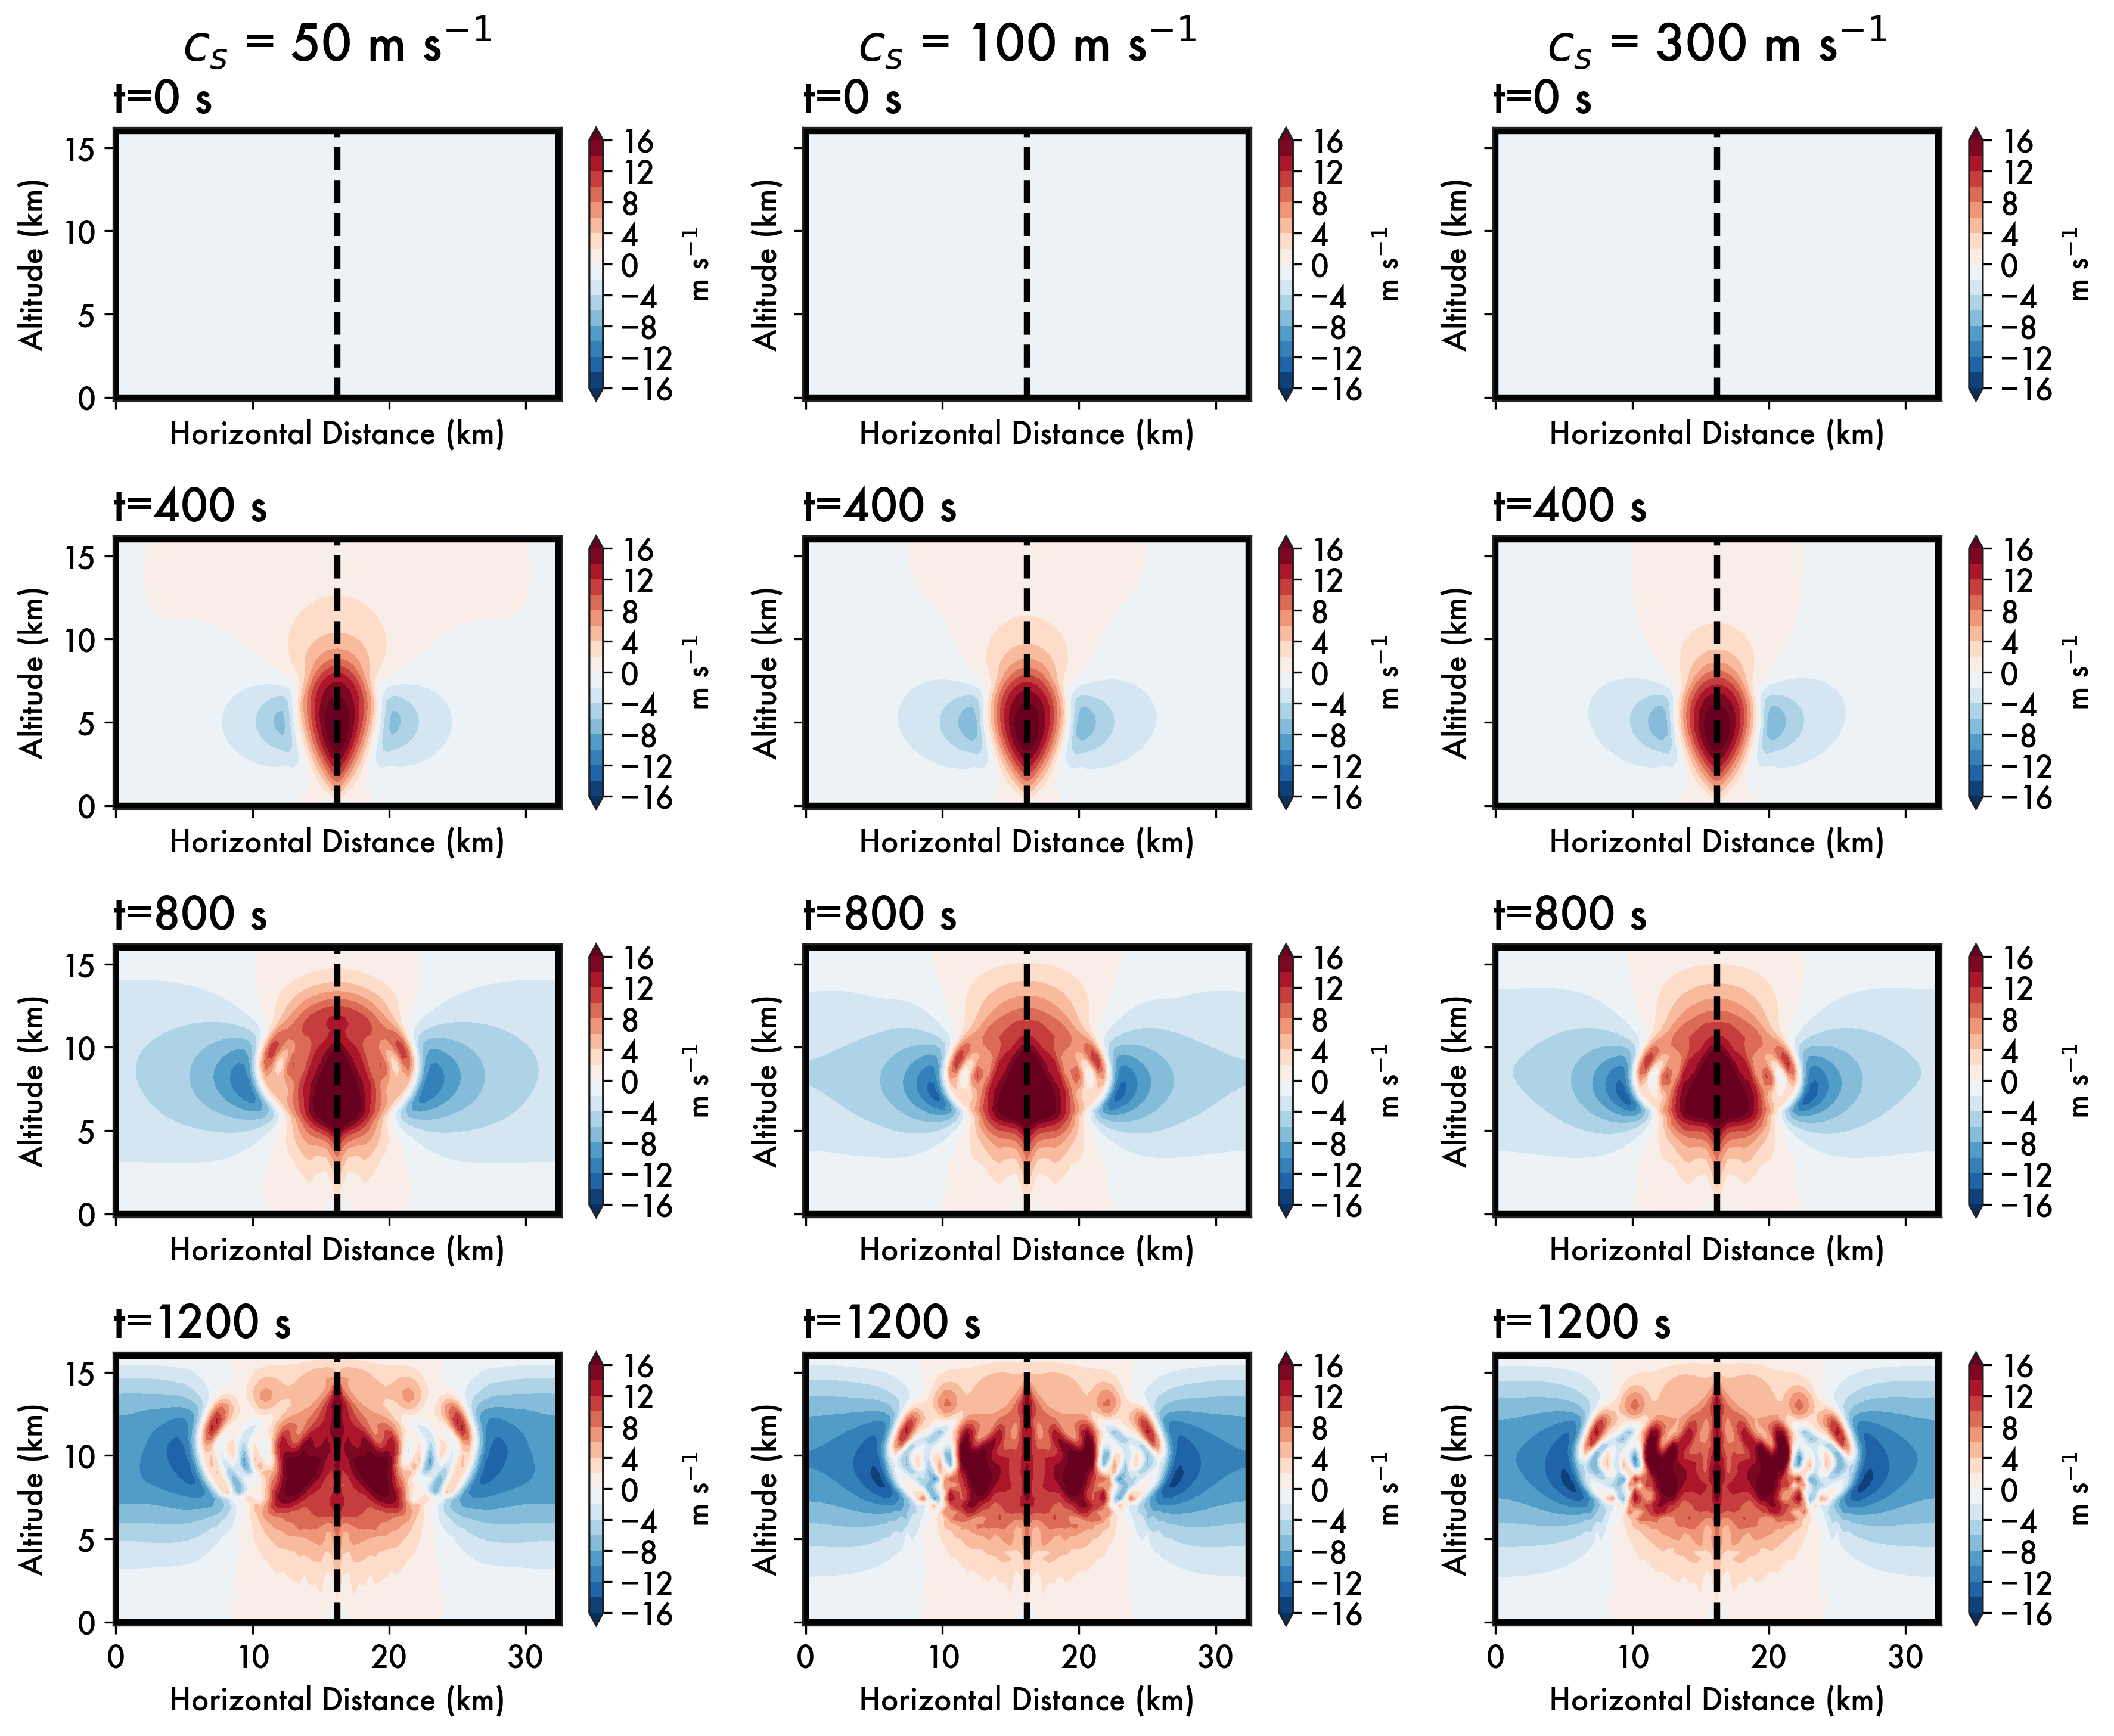

In [21]:
var = "WP_pres"
label = "m s$^{-1}$"
cmap = "RdBu_r"
norm = mcolors.TwoSlopeNorm(vcenter=0)
levels = np.arange(-16, 18, 2)

fig, axess = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12, 10))

for axes, time in zip(axess, [0, 200, 400, 600]):
    for ax, path in zip(axes, ["d400/", "c100/", "c300/"]):
        if path == "c100/":
            t = time * 2
        elif path == "c300/":
            t = time * 4
        else:
            t = time

        ax = plot_var(ax, path, var, label, t, 2 * time, levels, cmap, norm)

        if time == 600:
            ds = read_mac_output(f"{path}hw4_output_timestep_{t}.txt")
            print(path, ds[var].max().values)


for ax, lab in zip(axess[0], [50, 100, 300]):
    ax.text(
        0.5,
        1.3,
        f"$c_s$ = {lab} m s$^{{-1}}$",
        transform=ax.transAxes,
        va="center",
        ha="center",
        fontsize=20,
    )

plt.show()
plt.close("all")